In [79]:
from sklearn import svm
import matplotlib.pyplot as plt
%matplotlib inline
from sklearn.model_selection import train_test_split
from sklearn import linear_model
from sklearn.metrics import mean_squared_error, r2_score
import pandas as pd
from  math import sqrt 
from sklearn.datasets import load_boston
import matplotlib
import matplotlib.ticker as ticker
matplotlib.rcParams['figure.figsize'] = (24,18) #deault figure size
import seaborn as sns
import numpy as np
import scipy
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import LabelBinarizer
from sklearn.metrics import accuracy_score

In [80]:
df= pd.read_csv('C:/Users/gurun/Desktop/Foundation 2/adult.data')
print(df)
array = df.values

       39          State-gov   77516      Bachelors   13  \
0      50   Self-emp-not-inc   83311      Bachelors   13   
1      38            Private  215646        HS-grad    9   
2      53            Private  234721           11th    7   
3      28            Private  338409      Bachelors   13   
4      37            Private  284582        Masters   14   
5      49            Private  160187            9th    5   
6      52   Self-emp-not-inc  209642        HS-grad    9   
7      31            Private   45781        Masters   14   
8      42            Private  159449      Bachelors   13   
9      37            Private  280464   Some-college   10   
10     30          State-gov  141297      Bachelors   13   
11     23            Private  122272      Bachelors   13   
12     32            Private  205019     Assoc-acdm   12   
13     40            Private  121772      Assoc-voc   11   
14     34            Private  245487        7th-8th    4   
15     25   Self-emp-not-inc  176756    

In [81]:
df= pd.read_csv('C:/Users/gurun/Desktop/Foundation 2/adult.data',
        names=[
        "age", "workclass", "fnlwgt", "education", "education_num", "martial_status",
        "occupation", "relationship", "race", "sex", "capital_gain", "capital_loss",
        "hours_per_week", "nation_country", "income"],na_values=' ?')


In [82]:
df.head()

,age,workclass,fnlwgt,education,education_num,martial_status,occupation,relationship,race,sex,capital_gain,capital_loss,hours_per_week,nation_country,income
0,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K
1,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
2,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
3,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
4,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K


In [83]:
df.columns

Index(['age', 'workclass', 'fnlwgt', 'education', 'education_num',
       'martial_status', 'occupation', 'relationship', 'race', 'sex',
       'capital_gain', 'capital_loss', 'hours_per_week', 'nation_country',
       'income'],
      dtype='object')

In [84]:
df.shape

(32561, 15)

In [85]:
df.dtypes

age                int64
workclass         object
fnlwgt             int64
education         object
education_num      int64
martial_status    object
occupation        object
relationship      object
race              object
sex               object
capital_gain       int64
capital_loss       int64
hours_per_week     int64
nation_country    object
income            object
dtype: object

In [86]:
df.describe()

,age,fnlwgt,education_num,capital_gain,capital_loss,hours_per_week
count,32561.000000,3.256100e+04,32561.000000,32561.000000,32561.000000,32561.000000
mean,38.581647,1.897784e+05,10.080679,1077.648844,87.303830,40.437456
std,13.640433,1.055500e+05,2.572720,7385.292085,402.960219,12.347429
min,17.000000,1.228500e+04,1.000000,0.000000,0.000000,1.000000
25%,28.000000,1.178270e+05,9.000000,0.000000,0.000000,40.000000
50%,37.000000,1.783560e+05,10.000000,0.000000,0.000000,40.000000
75%,48.000000,2.370510e+05,12.000000,0.000000,0.000000,45.000000
max,90.000000,1.484705e+06,16.000000,99999.000000,4356.000000,99.000000


In [87]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32561 entries, 0 to 32560
Data columns (total 15 columns):
age               32561 non-null int64
workclass         30725 non-null object
fnlwgt            32561 non-null int64
education         32561 non-null object
education_num     32561 non-null int64
martial_status    32561 non-null object
occupation        30718 non-null object
relationship      32561 non-null object
race              32561 non-null object
sex               32561 non-null object
capital_gain      32561 non-null int64
capital_loss      32561 non-null int64
hours_per_week    32561 non-null int64
nation_country    31978 non-null object
income            32561 non-null object
dtypes: int64(6), object(9)
memory usage: 3.7+ MB


In [88]:
df.isnull().sum()

age                  0
workclass         1836
fnlwgt               0
education            0
education_num        0
martial_status       0
occupation        1843
relationship         0
race                 0
sex                  0
capital_gain         0
capital_loss         0
hours_per_week       0
nation_country     583
income               0
dtype: int64

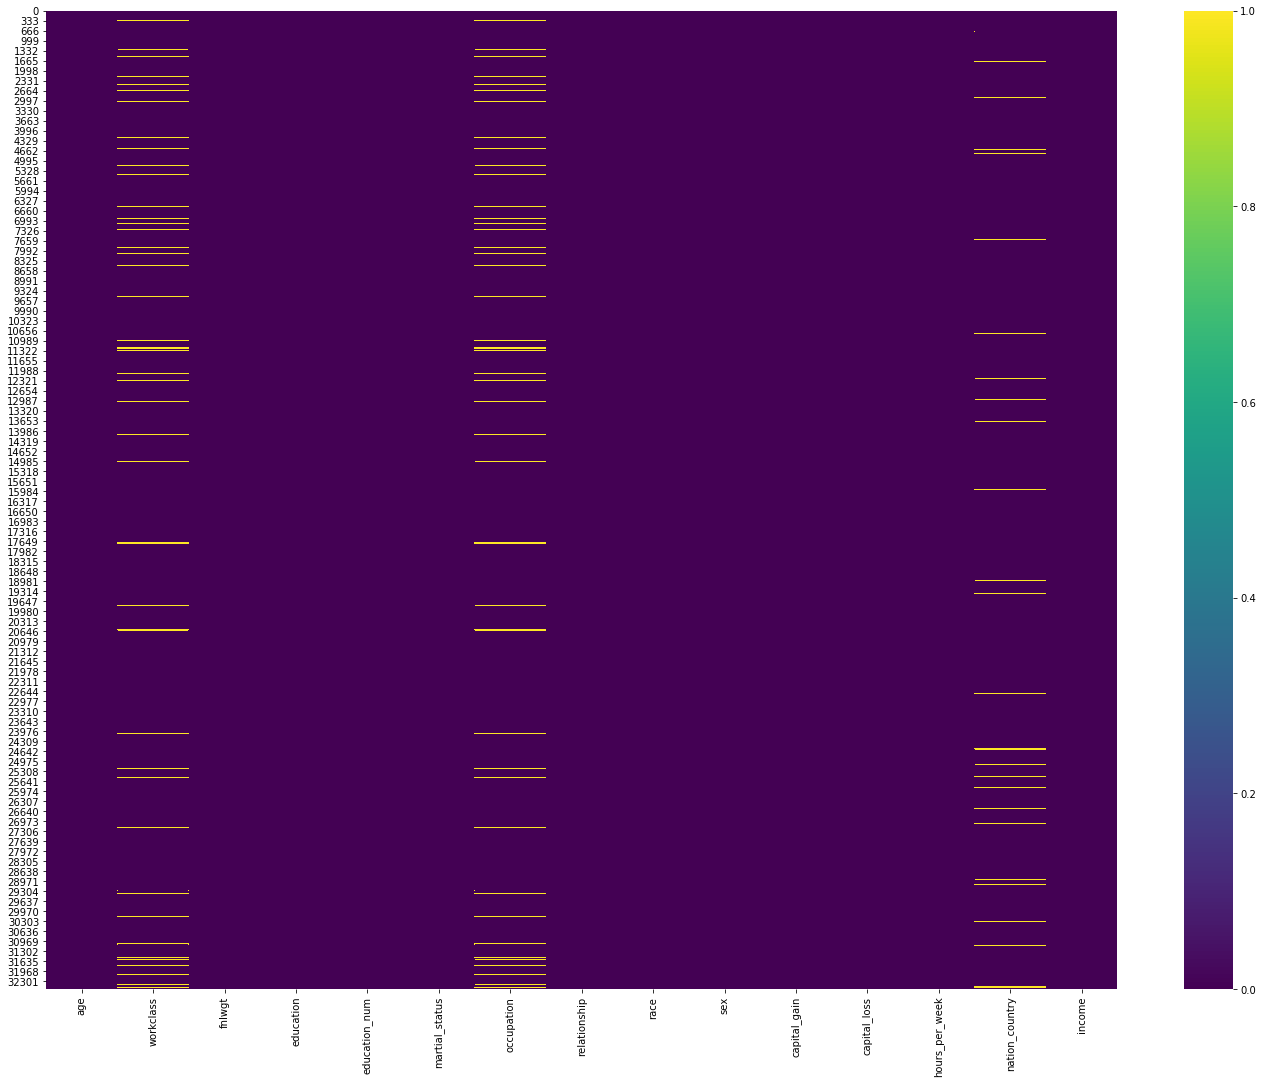

In [89]:
missing_values = df.isnull()
missing_values
sns.heatmap(data = missing_values, cmap='viridis')

In [90]:
df.drop(['workclass','occupation','nation_country'], axis=1, inplace=True)
df.head()

,age,fnlwgt,education,education_num,martial_status,relationship,race,sex,capital_gain,capital_loss,hours_per_week,income
0,39,77516,Bachelors,13,Never-married,Not-in-family,White,Male,2174,0,40,<=50K
1,50,83311,Bachelors,13,Married-civ-spouse,Husband,White,Male,0,0,13,<=50K
2,38,215646,HS-grad,9,Divorced,Not-in-family,White,Male,0,0,40,<=50K
3,53,234721,11th,7,Married-civ-spouse,Husband,Black,Male,0,0,40,<=50K
4,28,338409,Bachelors,13,Married-civ-spouse,Wife,Black,Female,0,0,40,<=50K


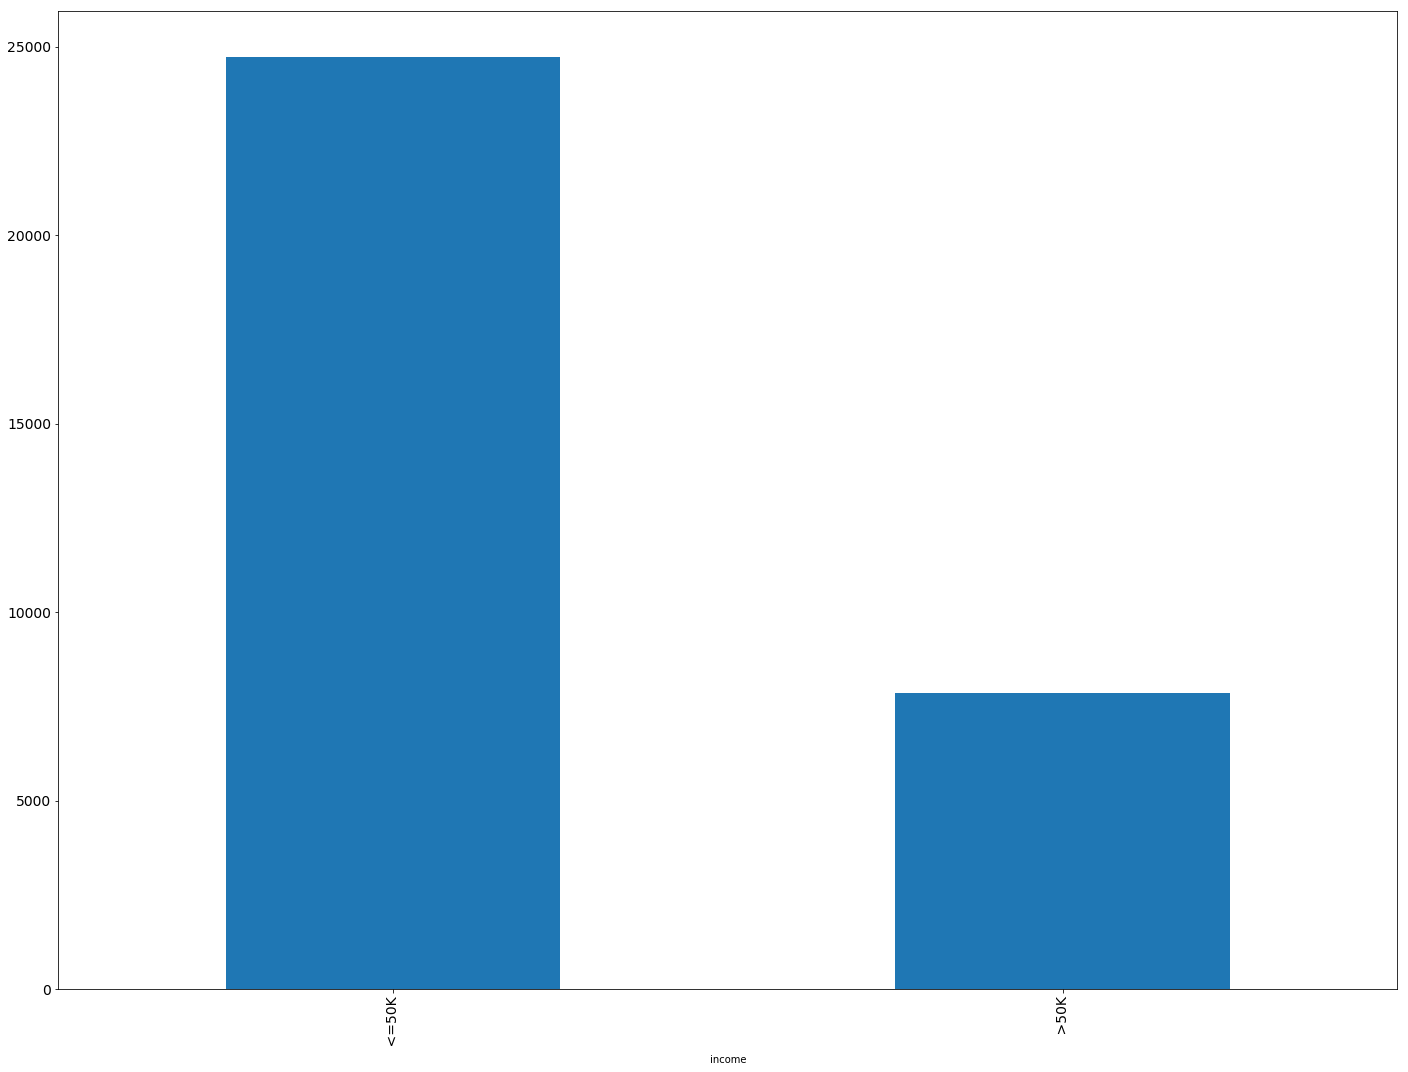

In [91]:
df.groupby(["income"]).size().plot(kind="bar",fontsize=14)

 <=50K    24720
 >50K      7841
Name: income, dtype: int64


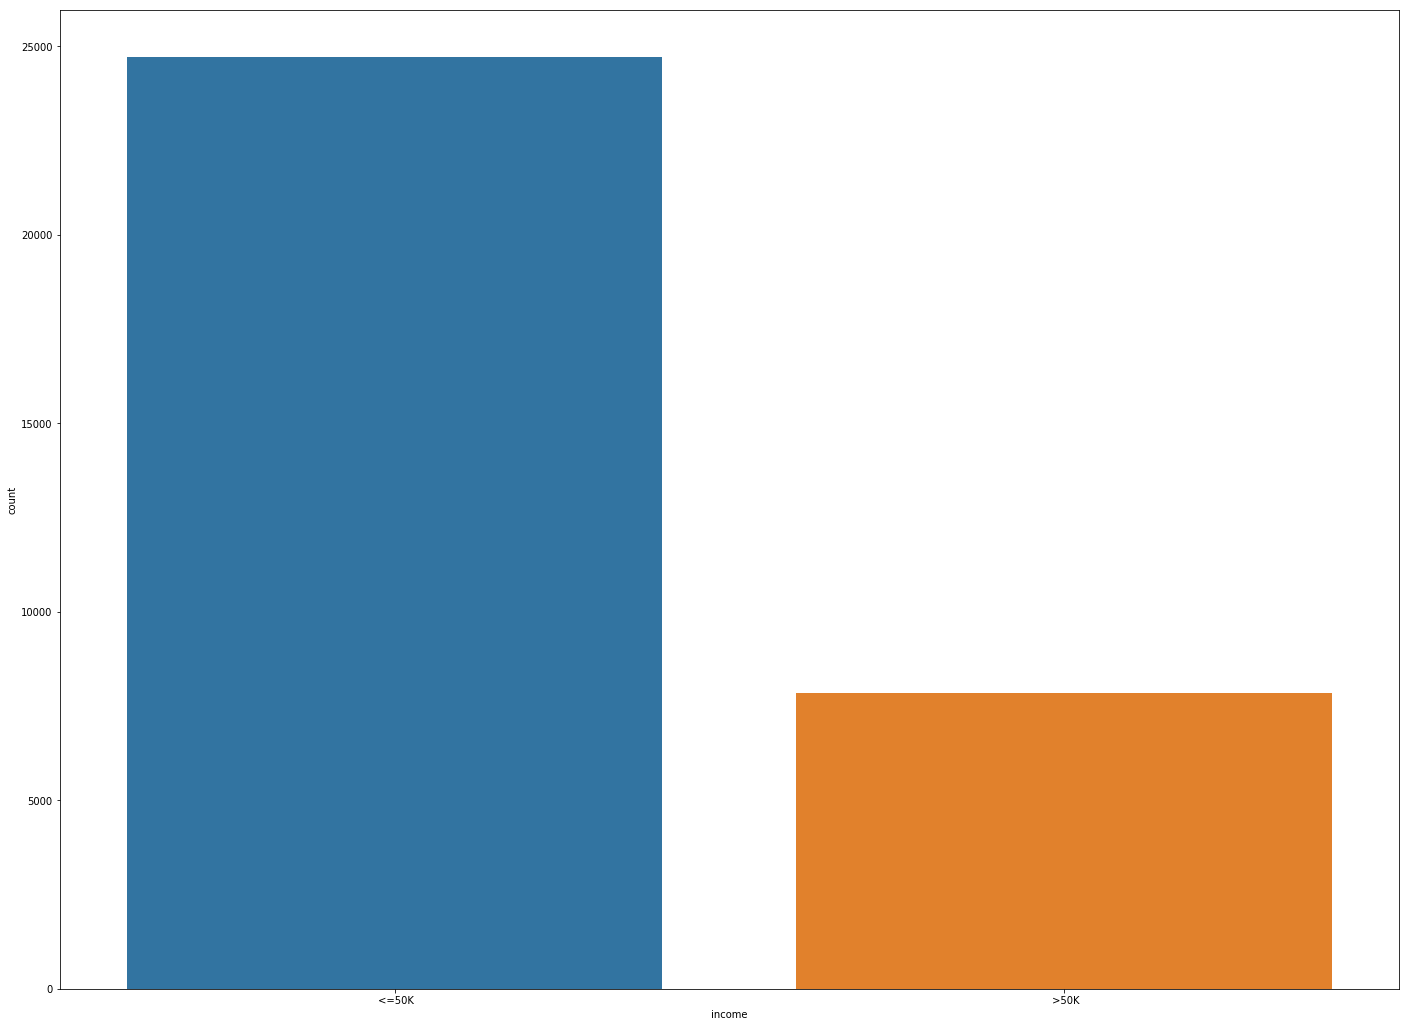

In [92]:
print(df['income'].value_counts())
sns.countplot(x="income", data=df)


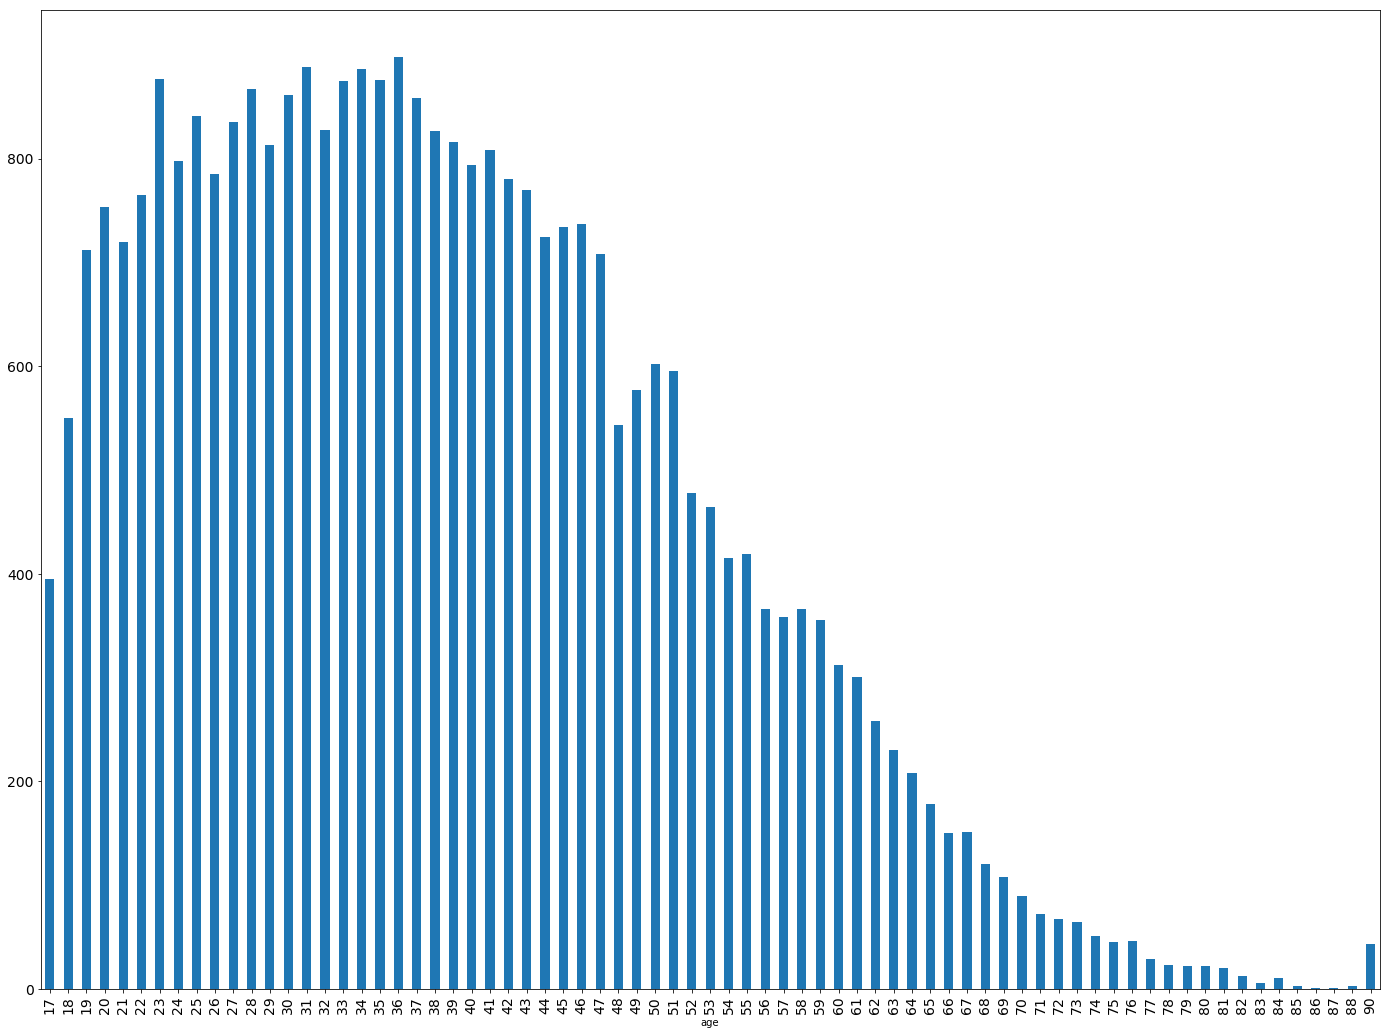

In [93]:
df.groupby(["age"]).size().plot(kind="bar",fontsize=14)

36    898
31    888
34    886
23    877
35    876
33    875
28    867
30    861
37    858
25    841
27    835
32    828
38    827
39    816
29    813
41    808
24    798
40    794
26    785
42    780
43    770
22    765
20    753
46    737
45    734
44    724
21    720
19    712
47    708
50    602
     ... 
60    312
61    300
62    258
63    230
64    208
65    178
67    151
66    150
68    120
69    108
70     89
71     72
72     67
73     64
74     51
76     46
75     45
90     43
77     29
78     23
80     22
79     22
81     20
82     12
84     10
83      6
85      3
88      3
87      1
86      1
Name: age, Length: 73, dtype: int64


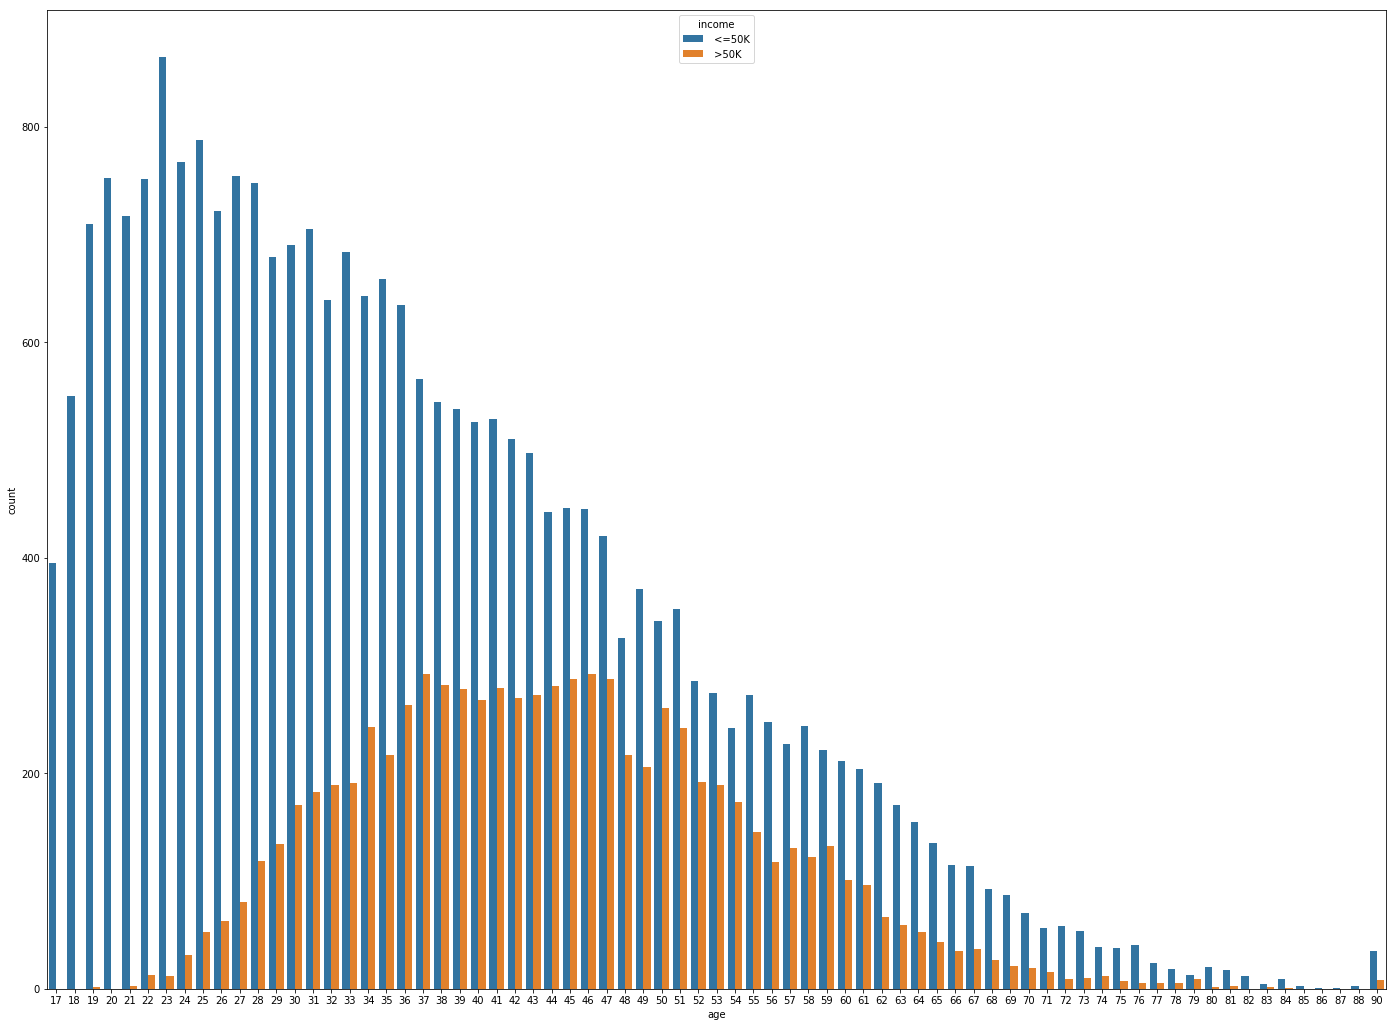

In [94]:
print(df['age'].value_counts())
sns.countplot(x="age", data=df,hue ='income')

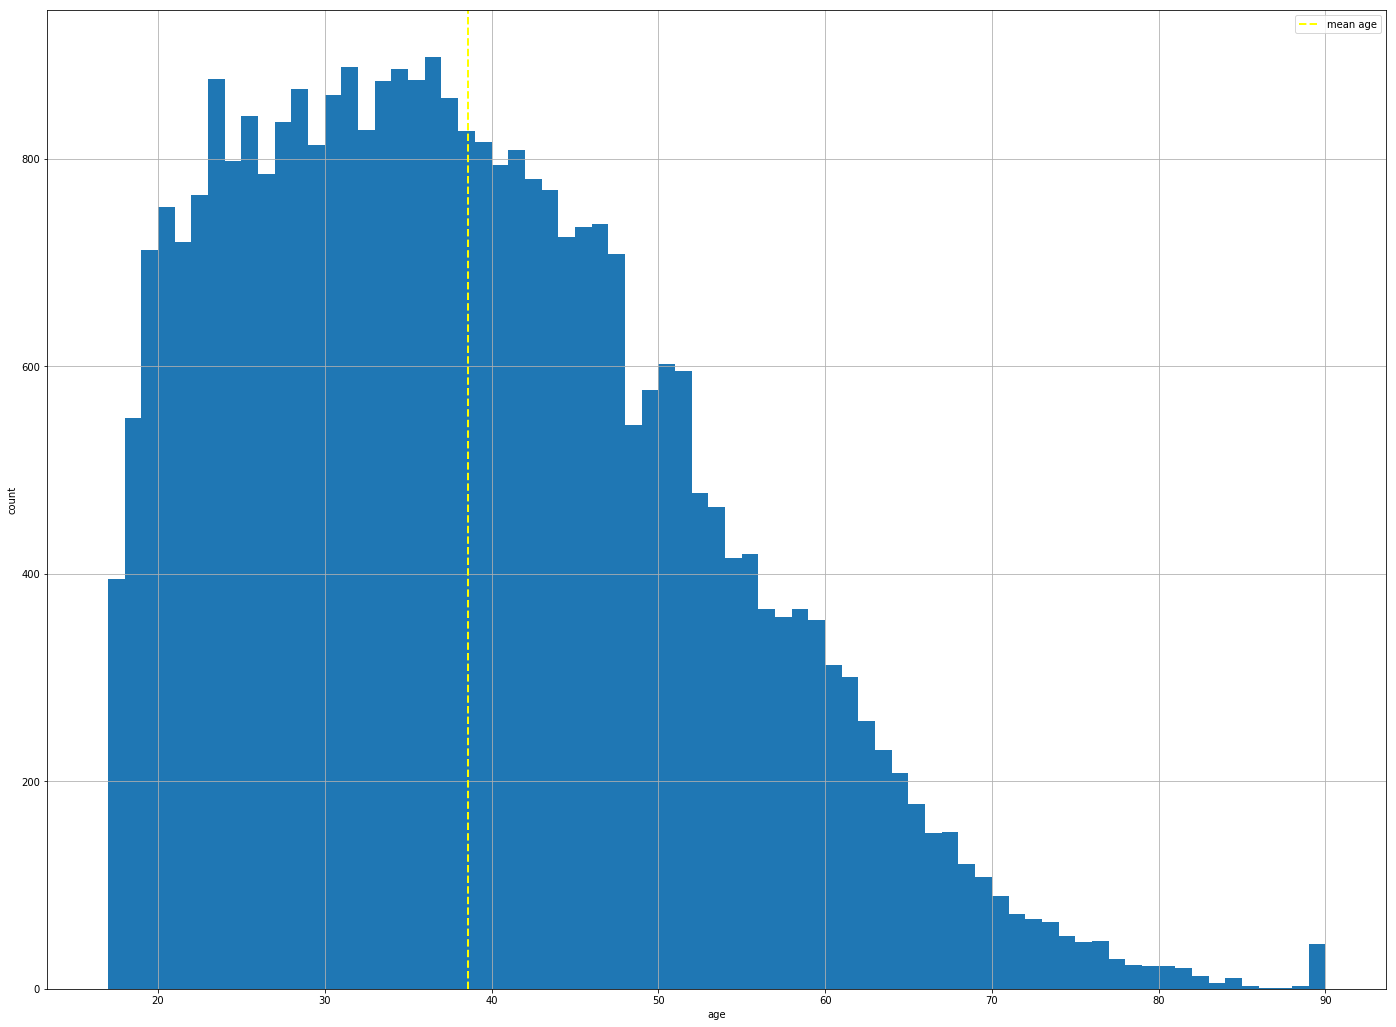

In [95]:
# Age distribution
ages = df['age'].hist(bins=max(df['age'])-min(df['age']))
mean_val = np.mean(df['age'])
plt.axvline(mean_val, linestyle='dashed', linewidth=2, color='yellow', label='mean age')
plt.xlabel('age')
plt.ylabel('count')
plt.legend()
plt.show()

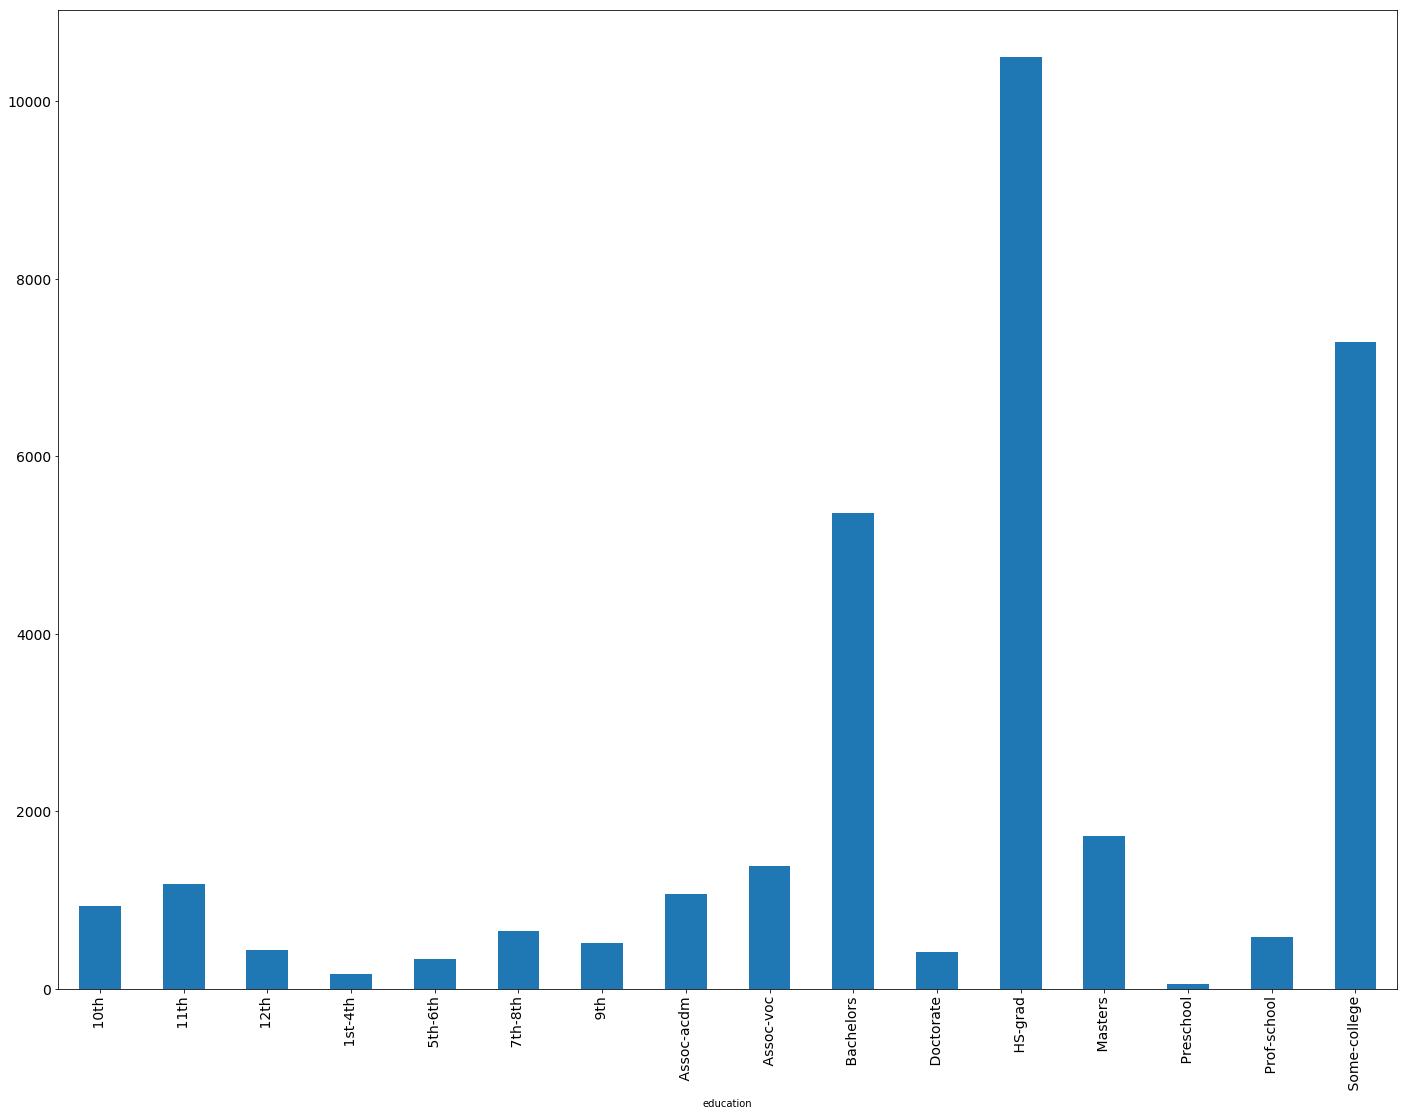

In [96]:
df.groupby(["education"]).size().plot(kind="bar",fontsize=14)

 HS-grad         10501
 Some-college     7291
 Bachelors        5355
 Masters          1723
 Assoc-voc        1382
 11th             1175
 Assoc-acdm       1067
 10th              933
 7th-8th           646
 Prof-school       576
 9th               514
 12th              433
 Doctorate         413
 5th-6th           333
 1st-4th           168
 Preschool          51
Name: education, dtype: int64


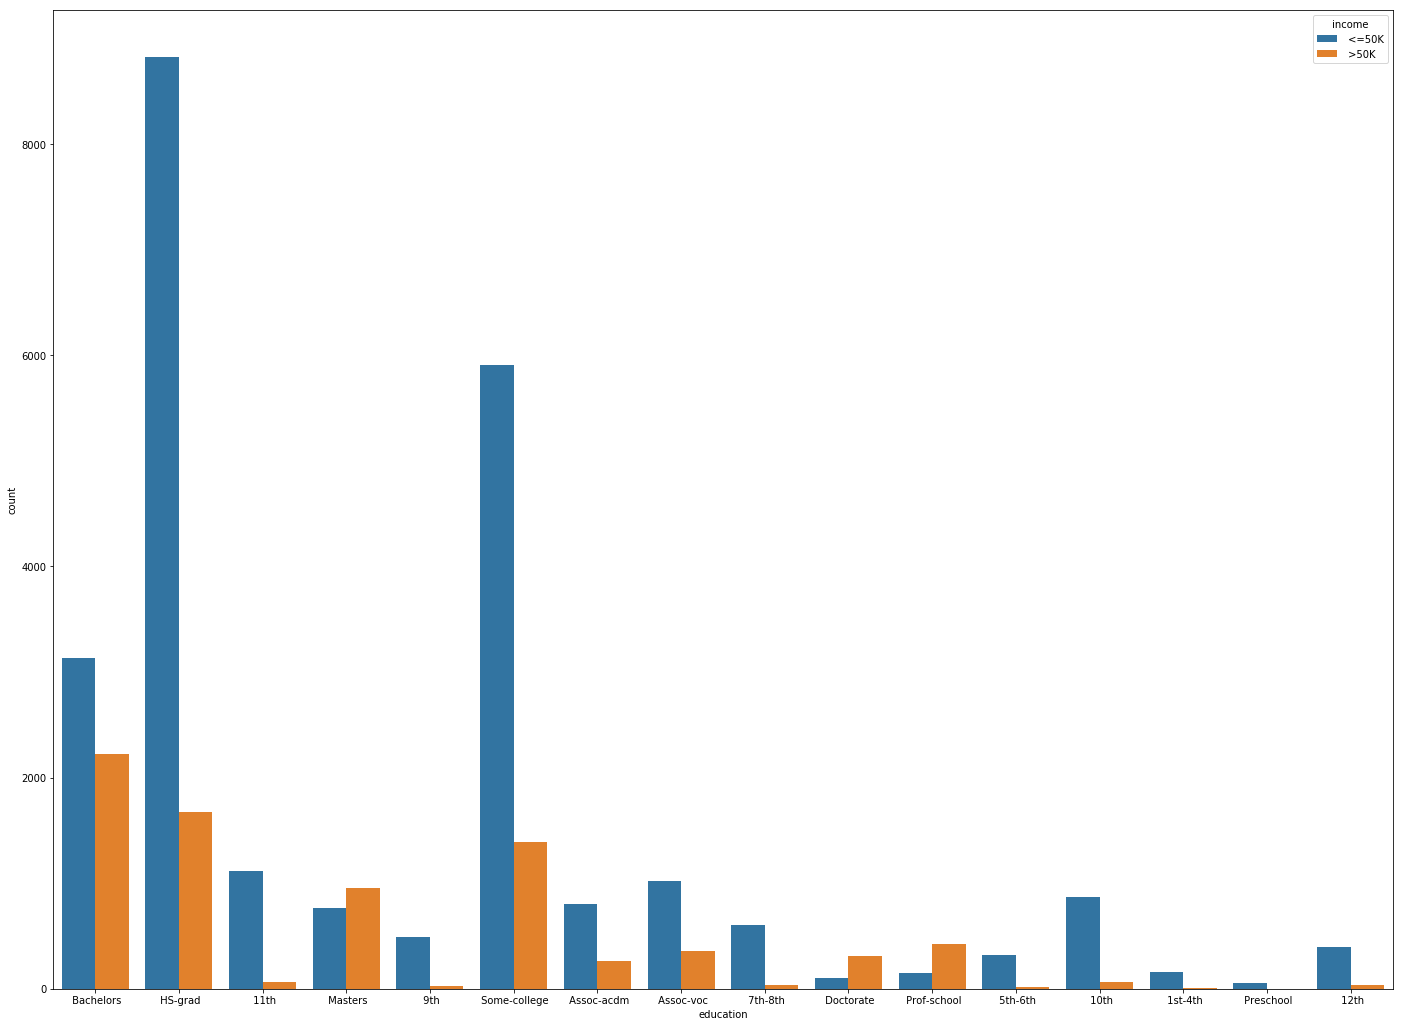

In [97]:
print(df['education'].value_counts())
sns.countplot(x="education", data=df,hue ='income')

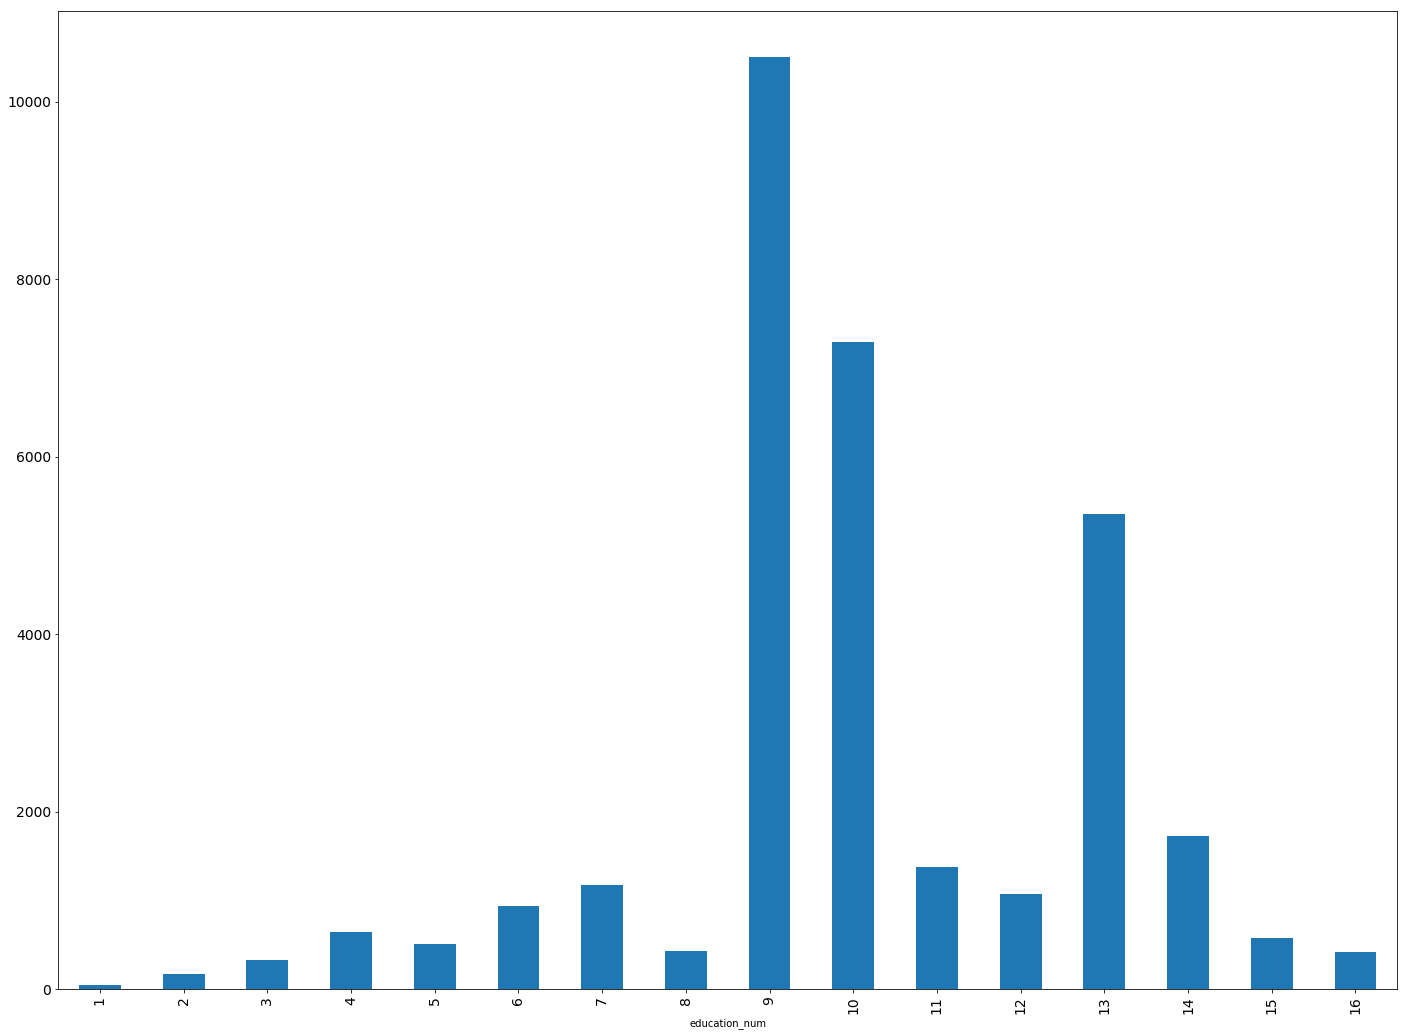

In [98]:
df.groupby(["education_num"]).size().plot(kind="bar",fontsize=14)

9     10501
10     7291
13     5355
14     1723
11     1382
7      1175
12     1067
6       933
4       646
15      576
5       514
8       433
16      413
3       333
2       168
1        51
Name: education_num, dtype: int64


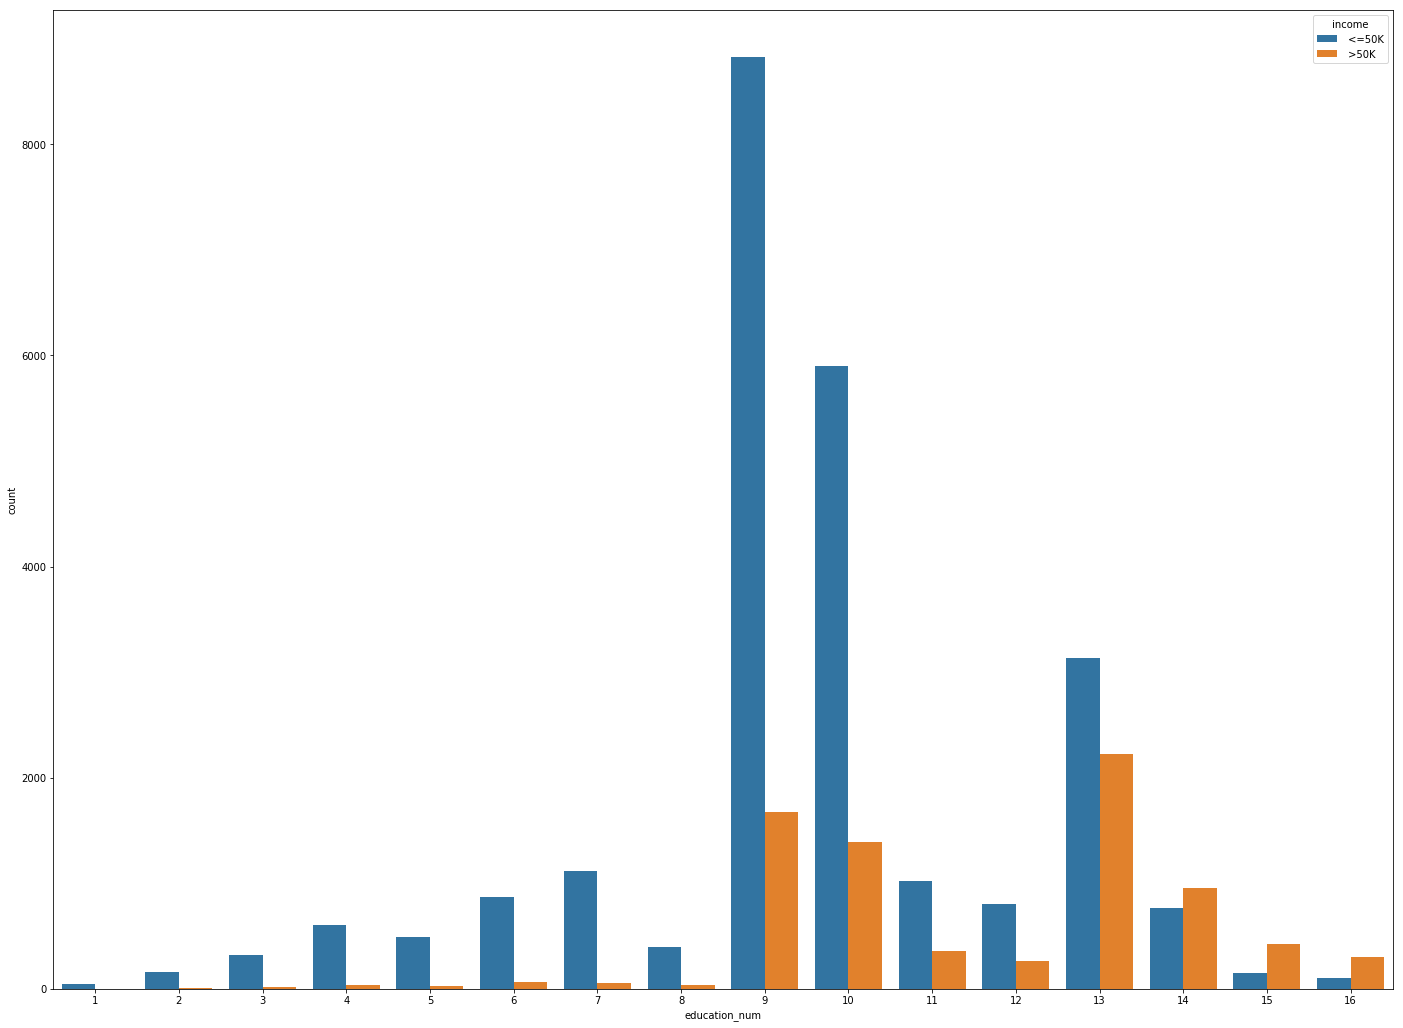

In [99]:
print(df['education_num'].value_counts())
sns.countplot(x="education_num", data=df,hue ='income')

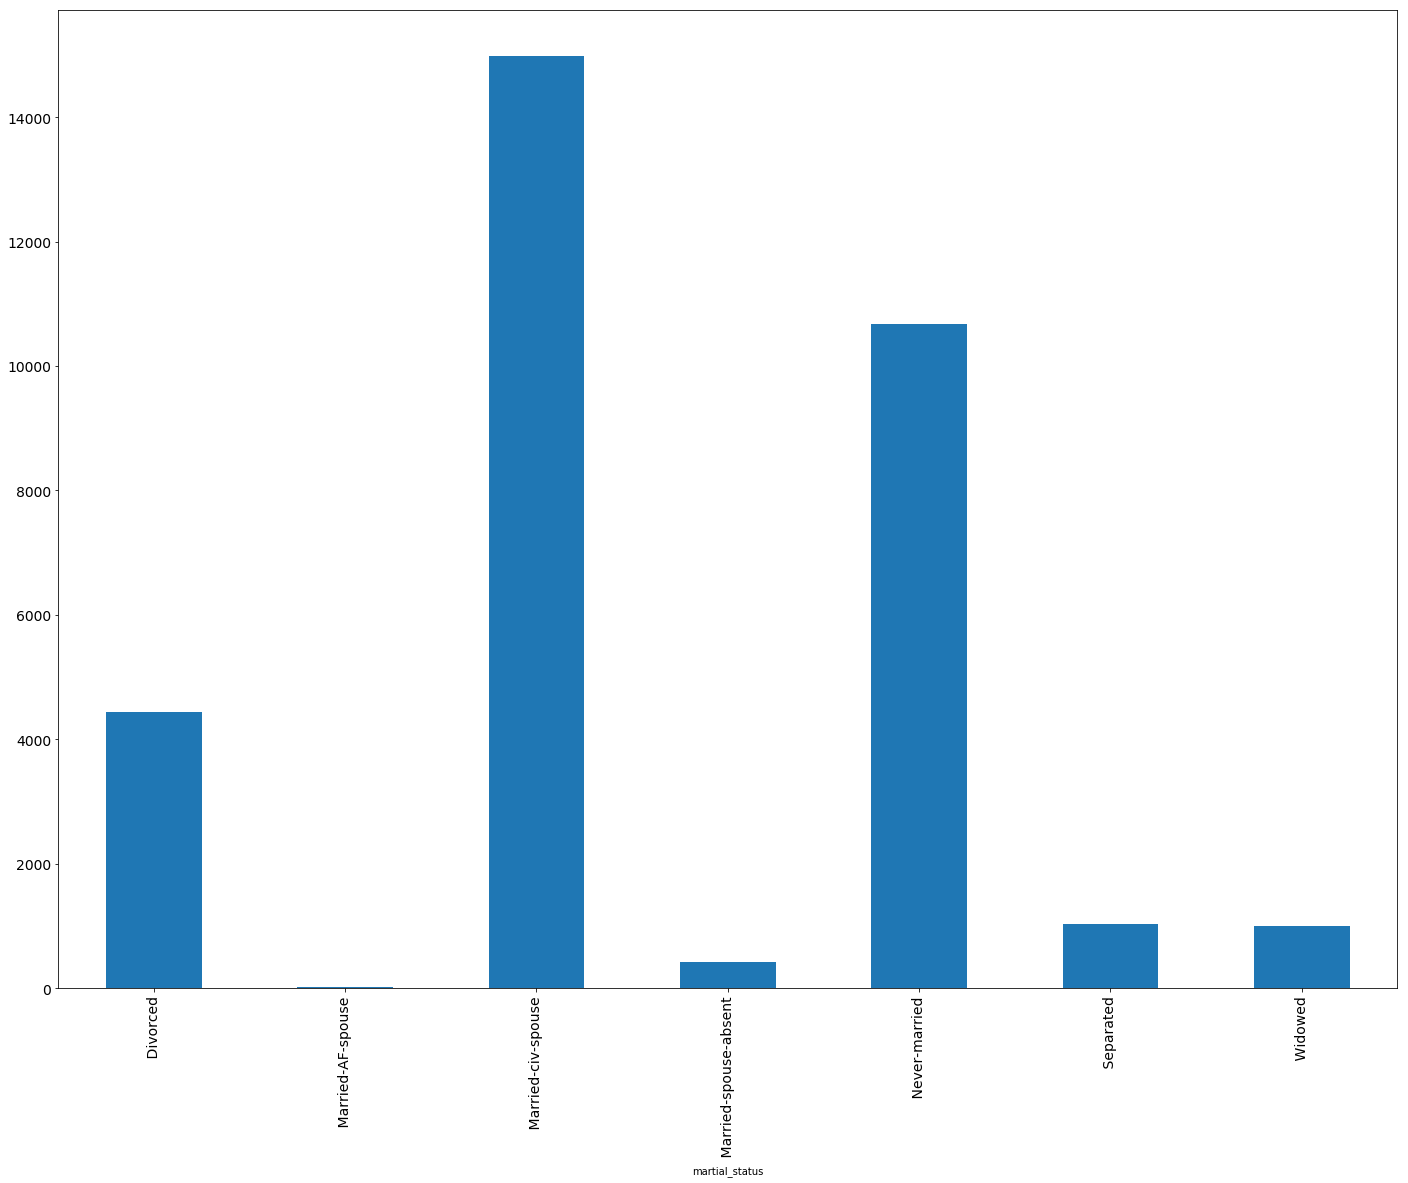

In [100]:
df.groupby(["martial_status"]).size().plot(kind="bar",fontsize=14)

 Married-civ-spouse       14976
 Never-married            10683
 Divorced                  4443
 Separated                 1025
 Widowed                    993
 Married-spouse-absent      418
 Married-AF-spouse           23
Name: martial_status, dtype: int64


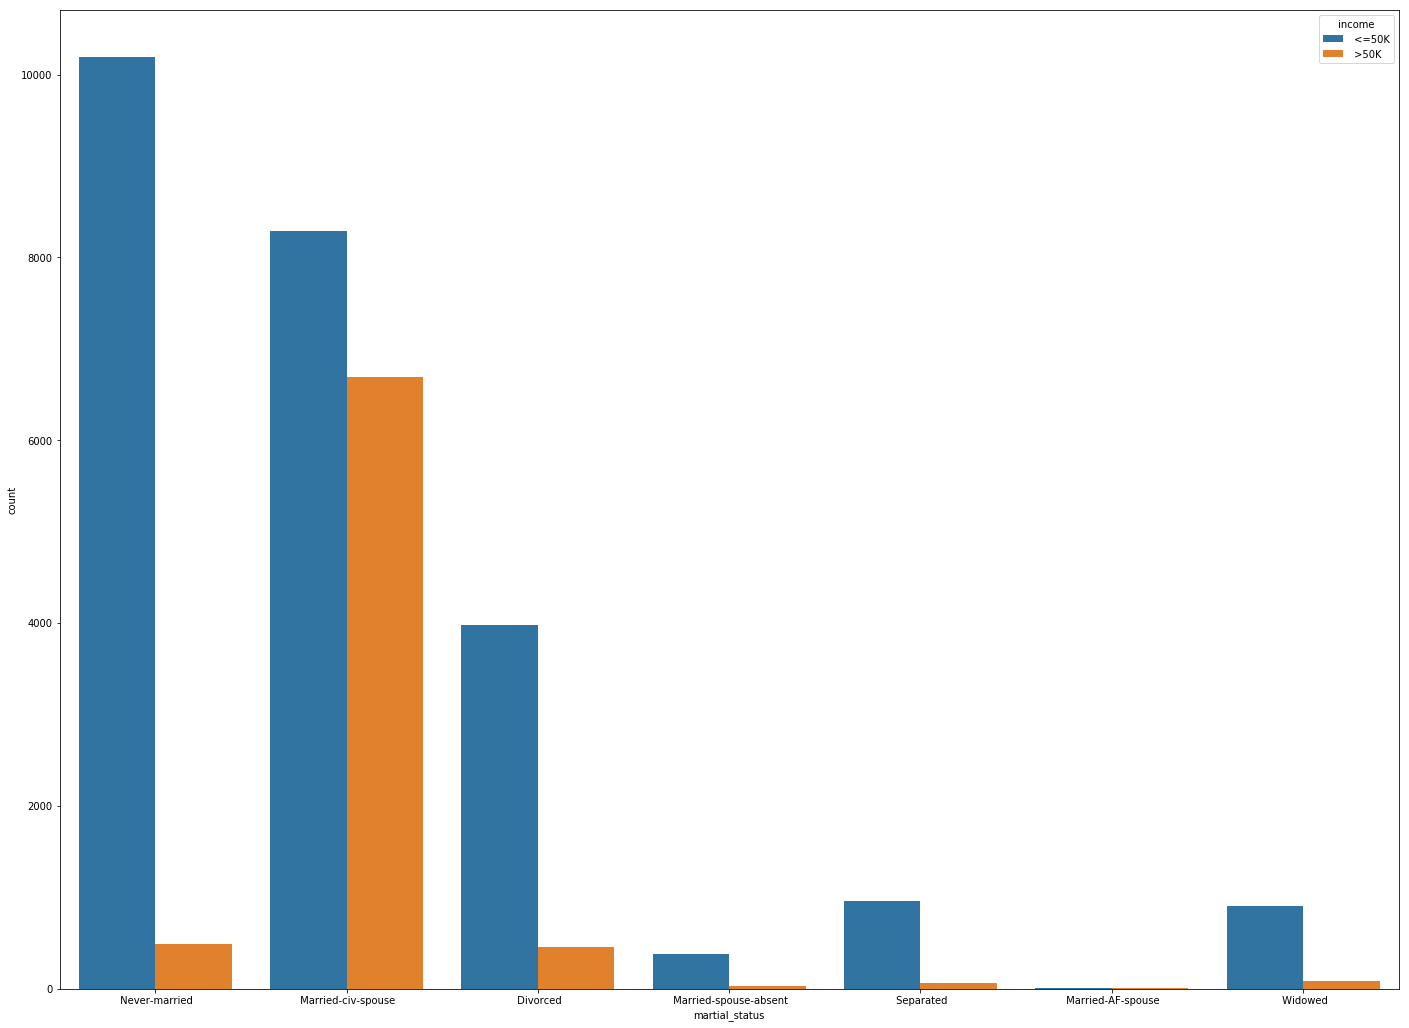

In [101]:
print(df['martial_status'].value_counts())
sns.countplot(x="martial_status", data=df,hue ='income')

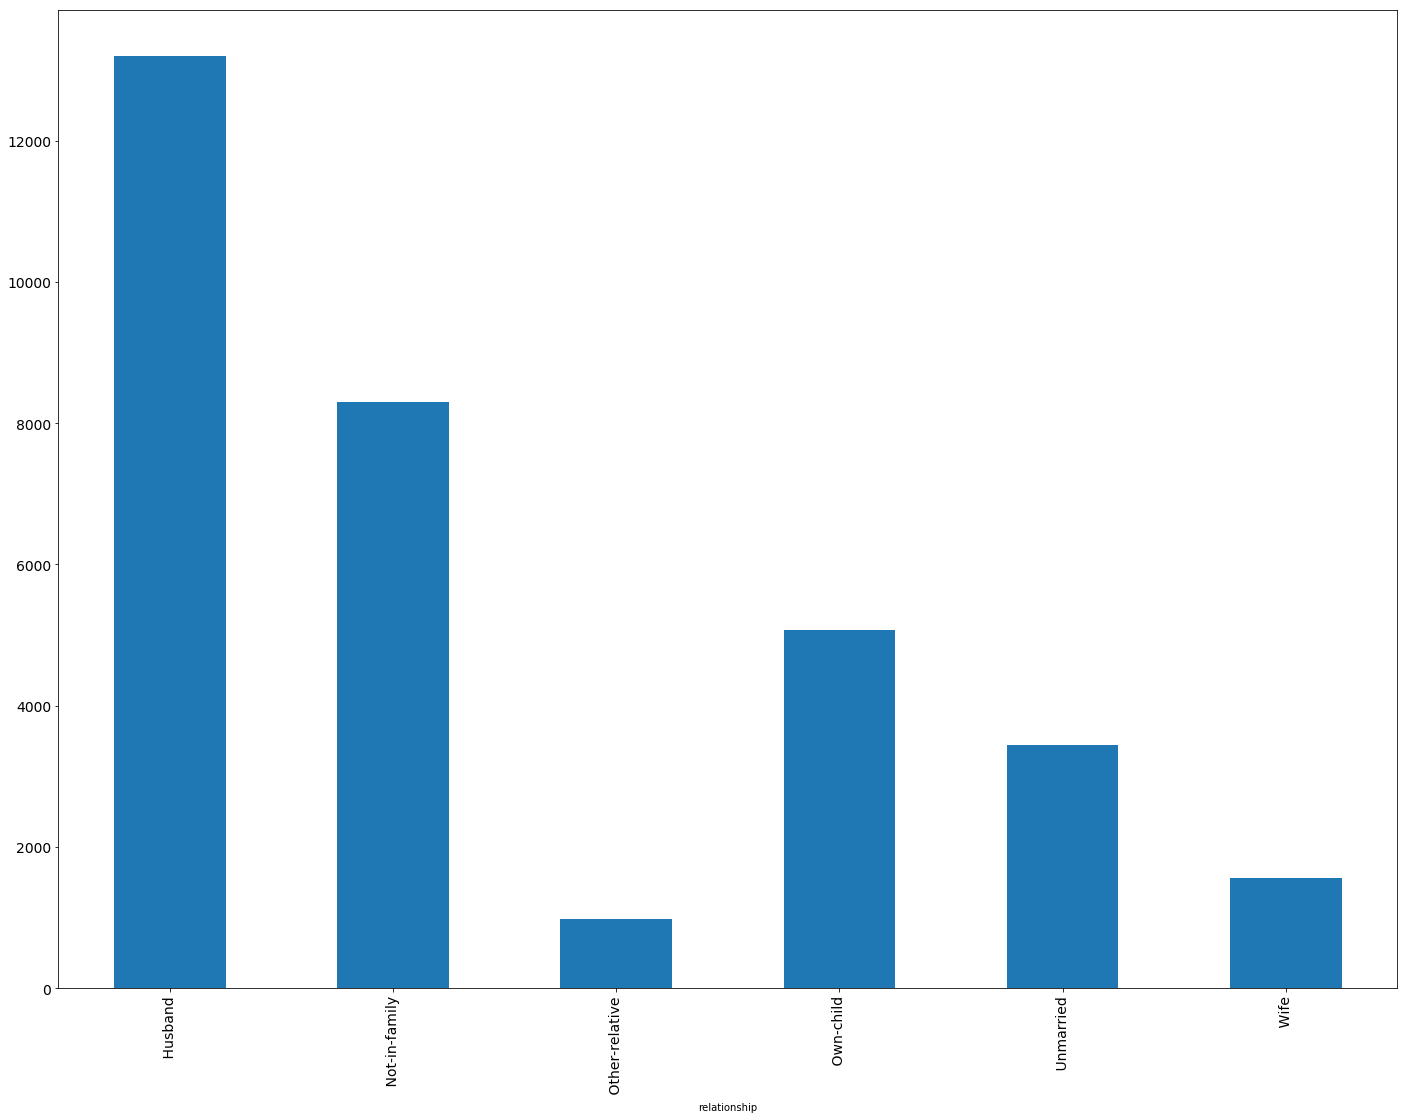

In [102]:
df.groupby(["relationship"]).size().plot(kind="bar",fontsize=14)

 Husband           13193
 Not-in-family      8305
 Own-child          5068
 Unmarried          3446
 Wife               1568
 Other-relative      981
Name: relationship, dtype: int64


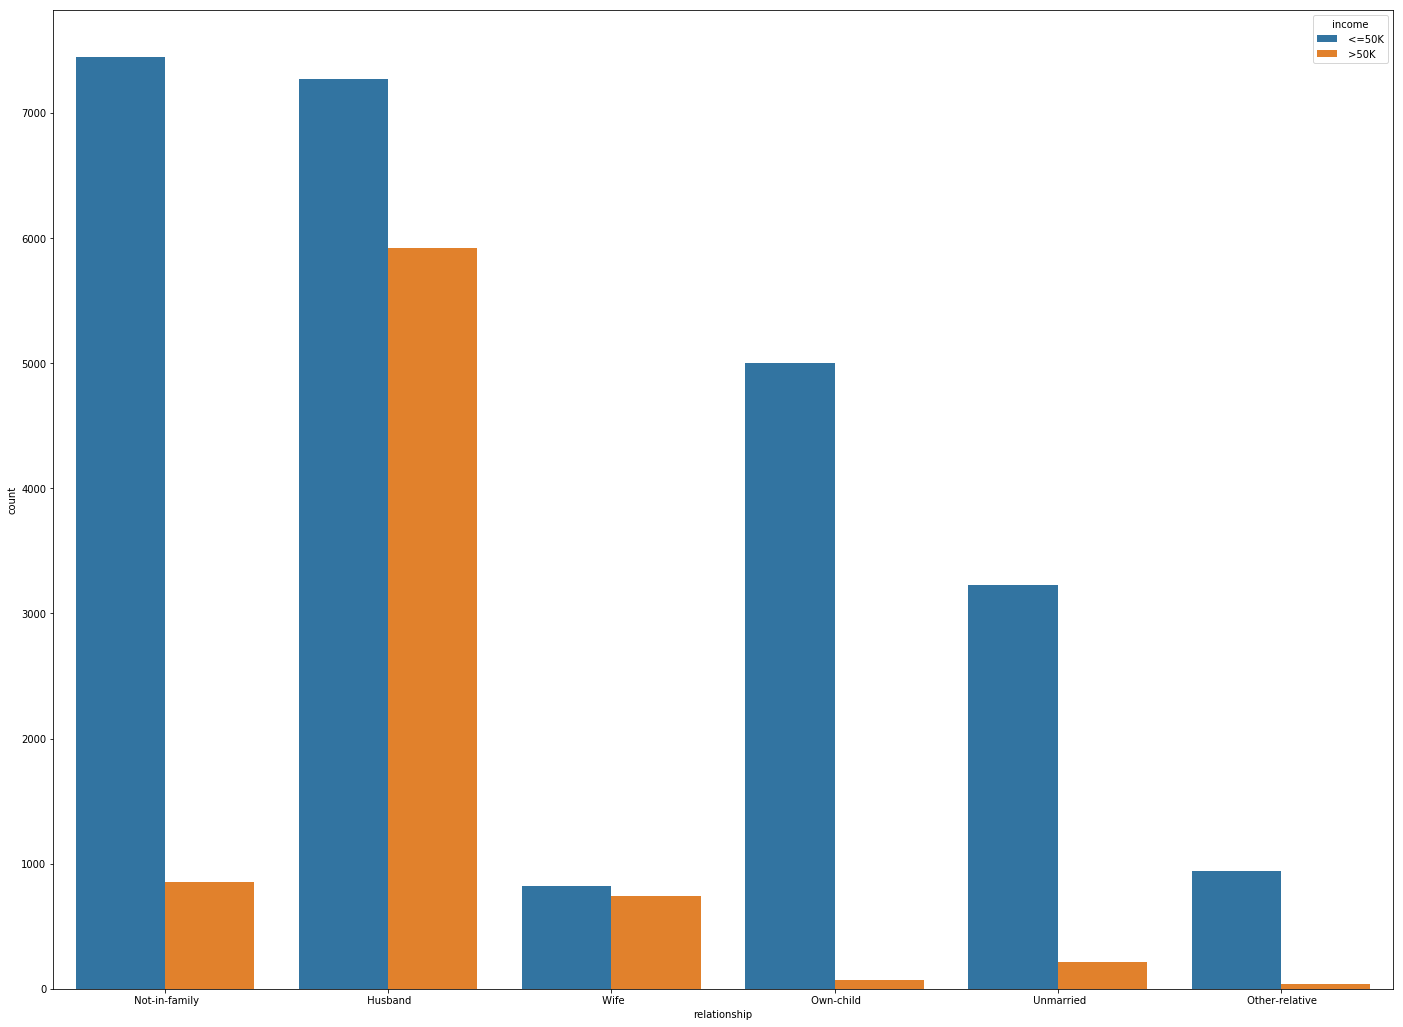

In [103]:
print(df['relationship'].value_counts())
sns.countplot(x="relationship", data=df,hue ='income')

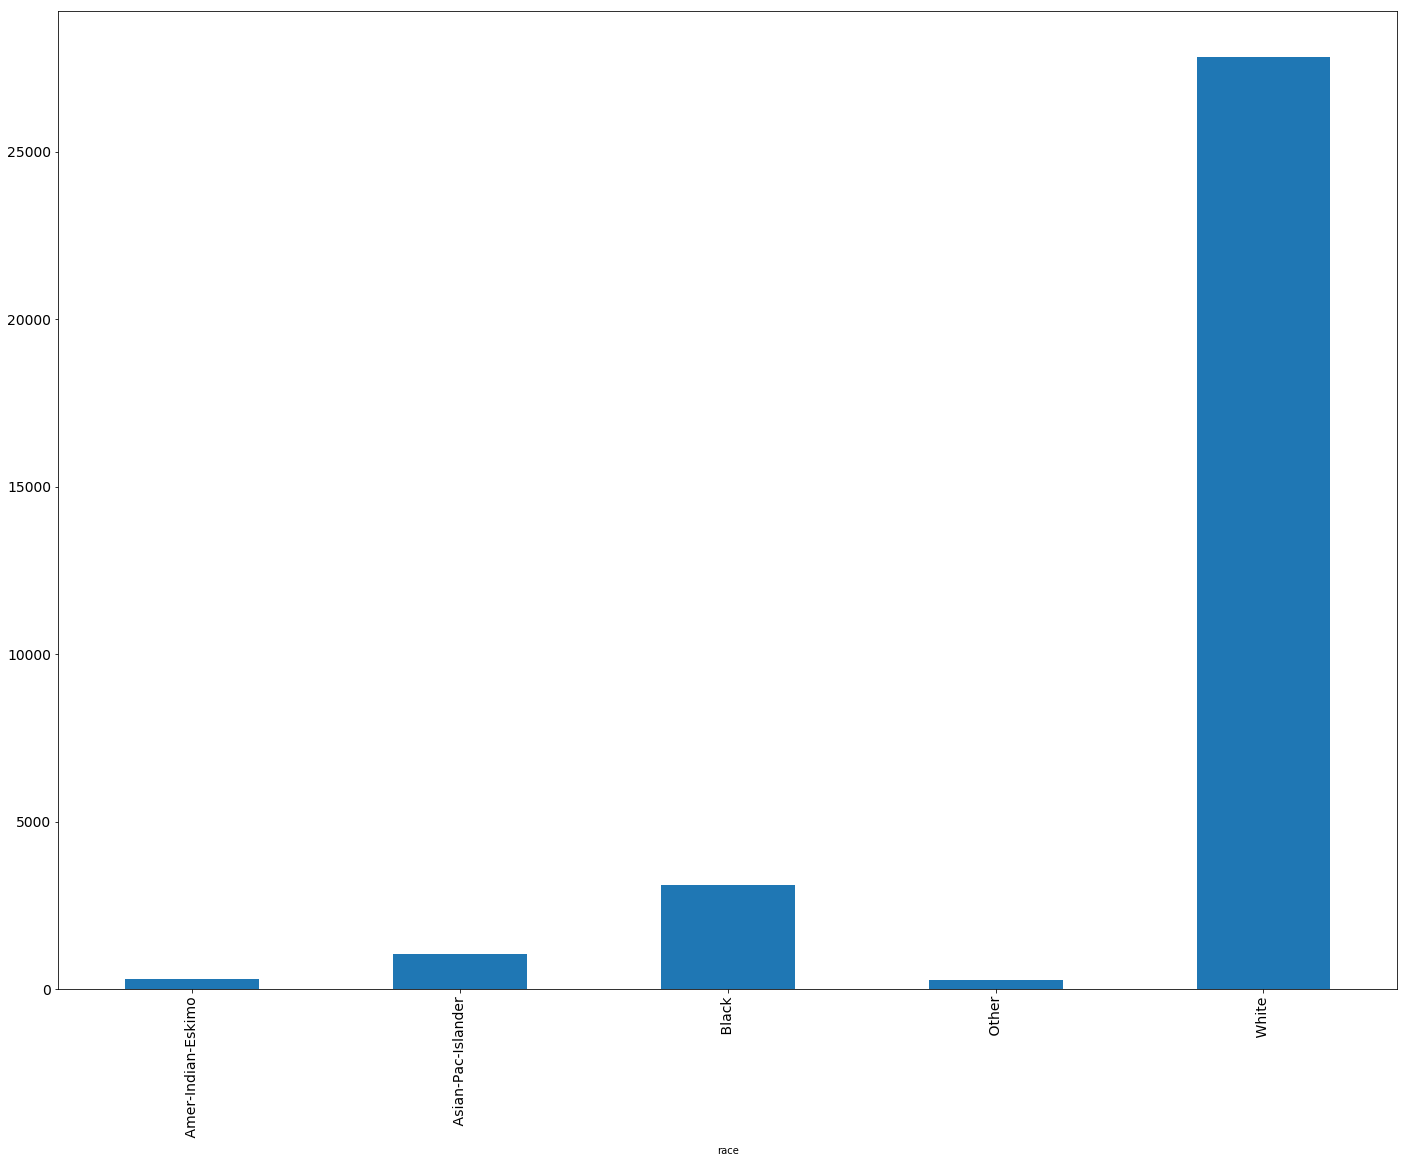

In [104]:
df.groupby(["race"]).size().plot(kind="bar",fontsize=14)

 White                 27816
 Black                  3124
 Asian-Pac-Islander     1039
 Amer-Indian-Eskimo      311
 Other                   271
Name: race, dtype: int64


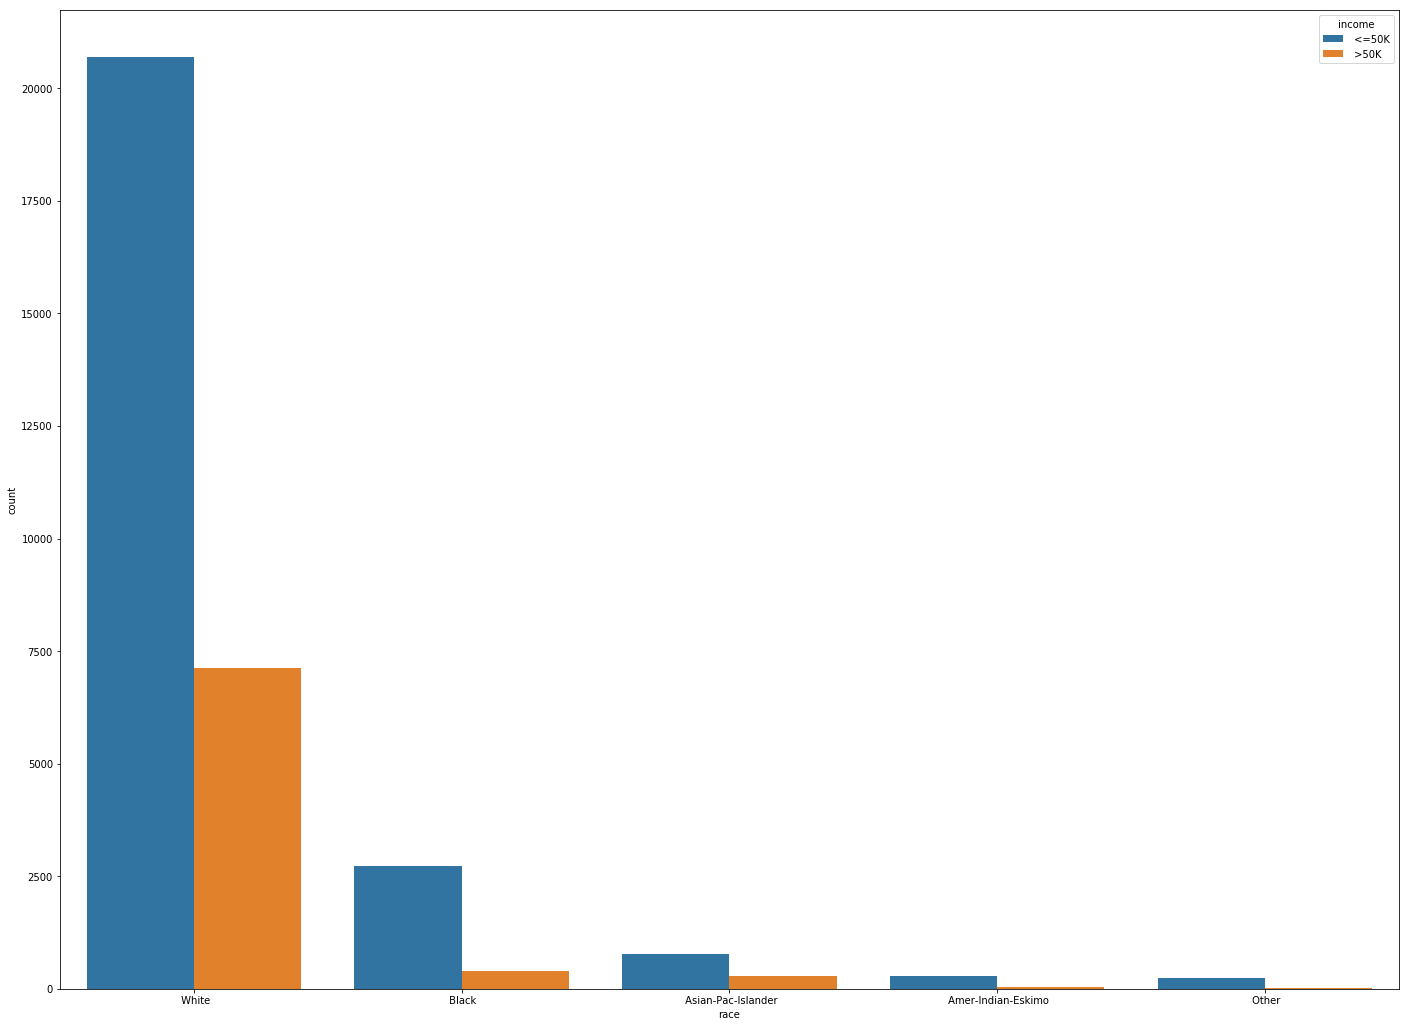

In [105]:
print(df['race'].value_counts())
sns.countplot(x="race", data=df,hue ='income')

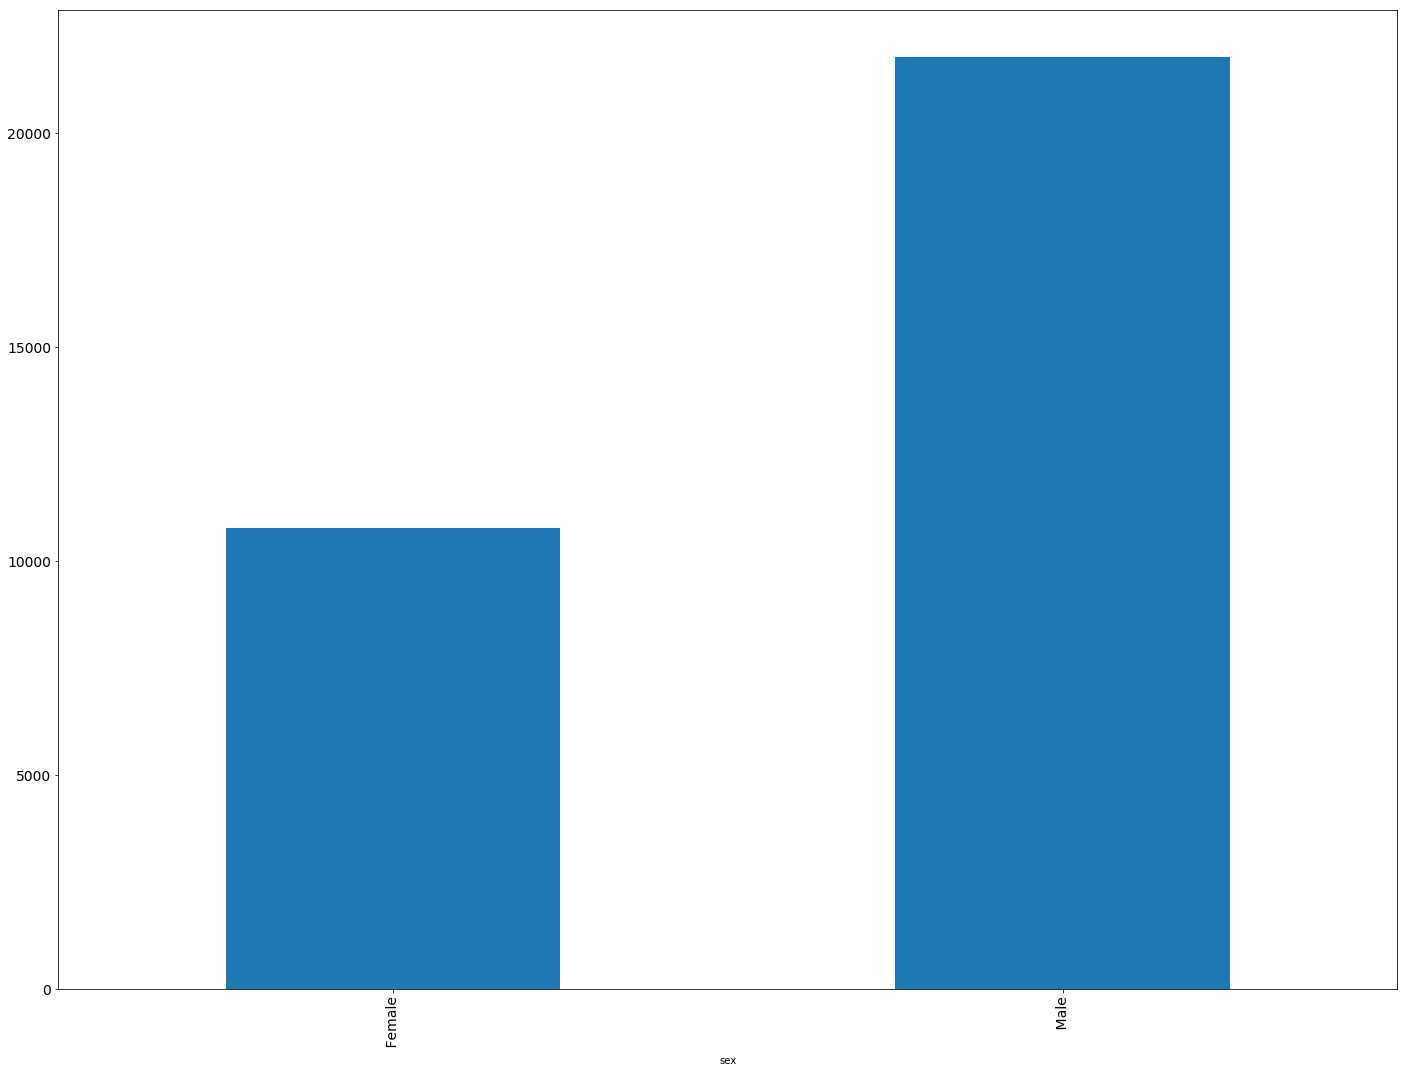

In [106]:
df.groupby(["sex"]).size().plot(kind="bar",fontsize=14)

 Male      21790
 Female    10771
Name: sex, dtype: int64


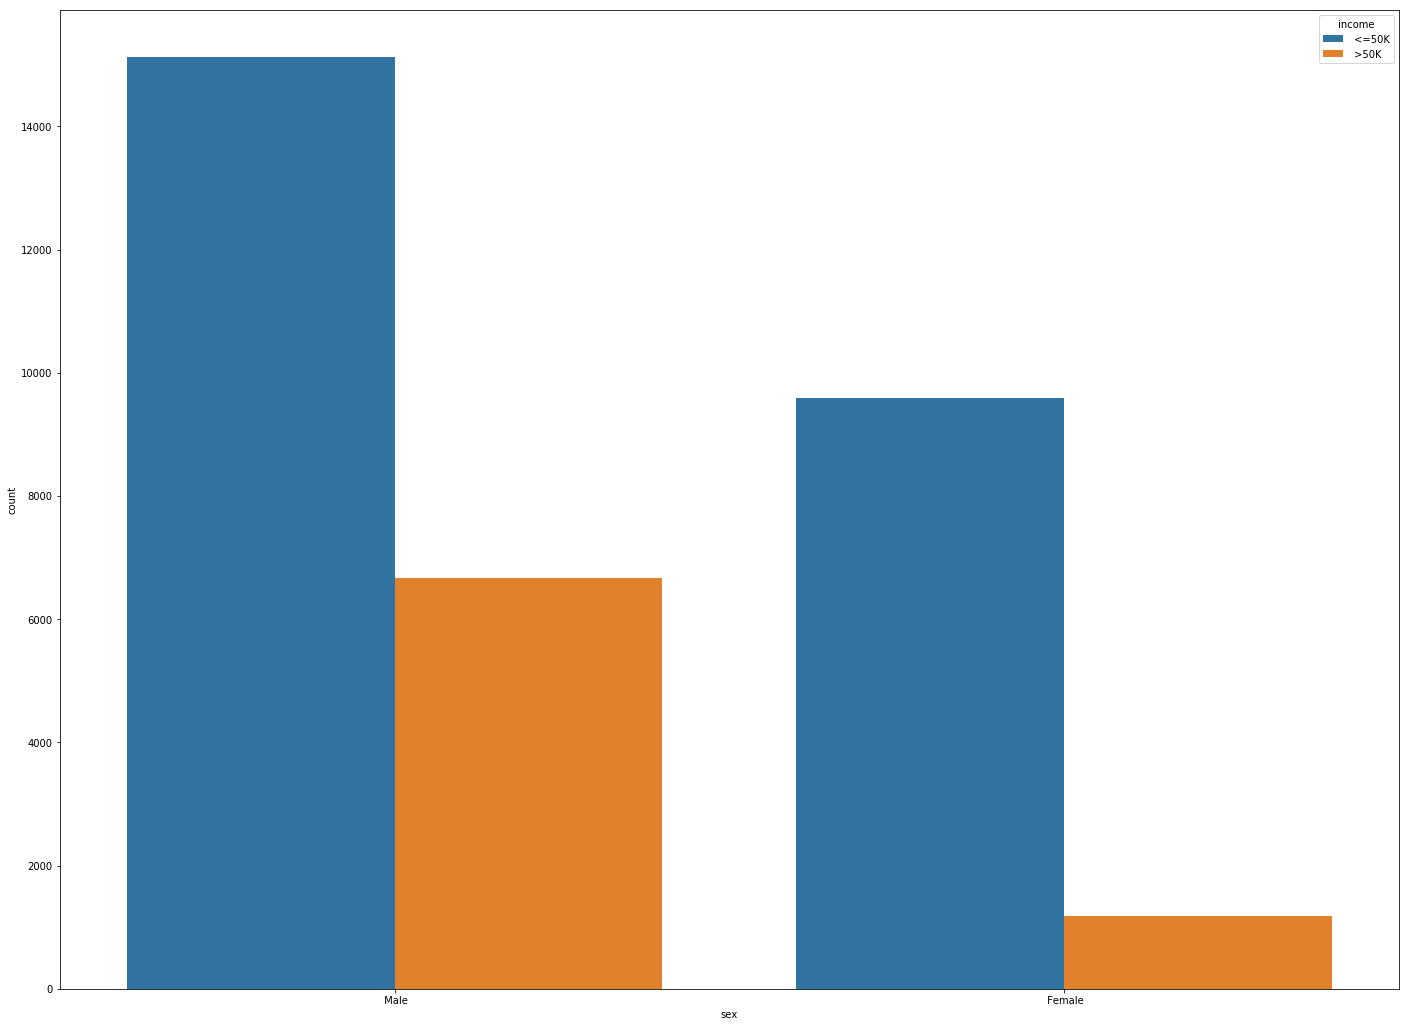

In [107]:
print(df['sex'].value_counts())
sns.countplot(x="sex", data=df,hue ='income')

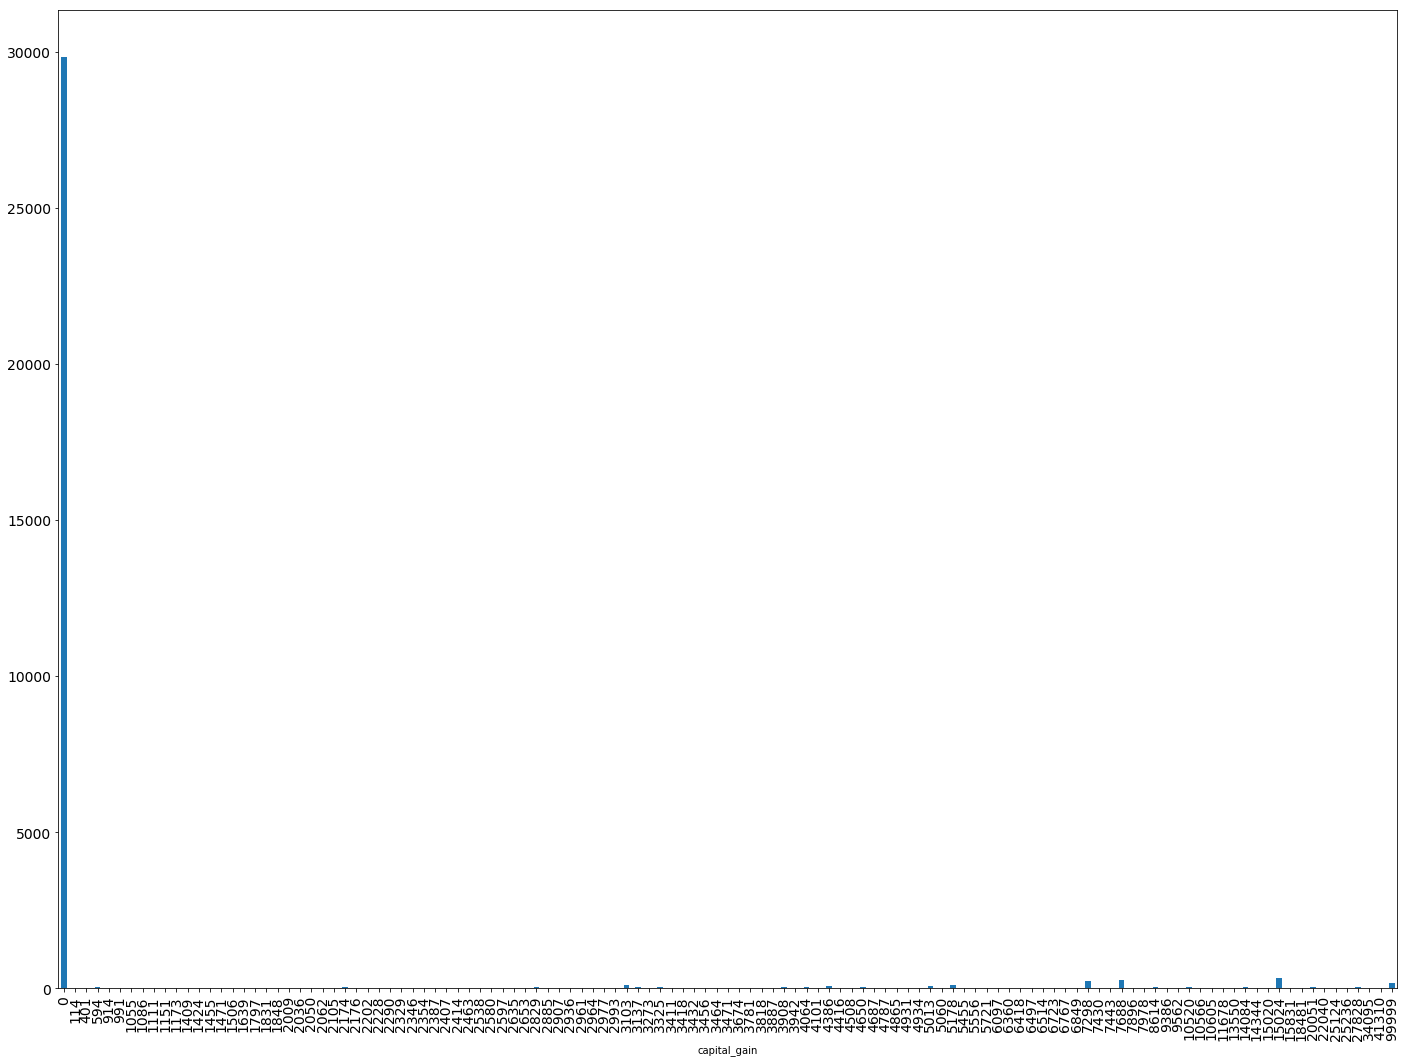

In [108]:
df.groupby(["capital_gain"]).size().plot(kind="bar",fontsize=14)

0        29849
15024      347
7688       284
7298       246
99999      159
5178        97
3103        97
4386        70
5013        69
8614        55
3325        53
2174        48
10520       43
4064        42
4650        41
14084       41
20051       37
3137        37
27828       34
594         34
3908        32
2829        31
13550       27
6849        27
14344       26
1055        25
2885        24
3411        24
4787        23
2176        23
         ...  
9562         4
1086         4
25124        4
1424         3
2961         3
7896         3
4687         3
2936         3
1173         3
5721         3
2009         3
6360         3
41310        2
6723         2
3456         2
2993         2
401          2
11678        2
2062         2
18481        2
7978         1
1639         1
2538         1
2387         1
5060         1
4931         1
1455         1
6097         1
22040        1
1111         1
Name: capital_gain, Length: 119, dtype: int64


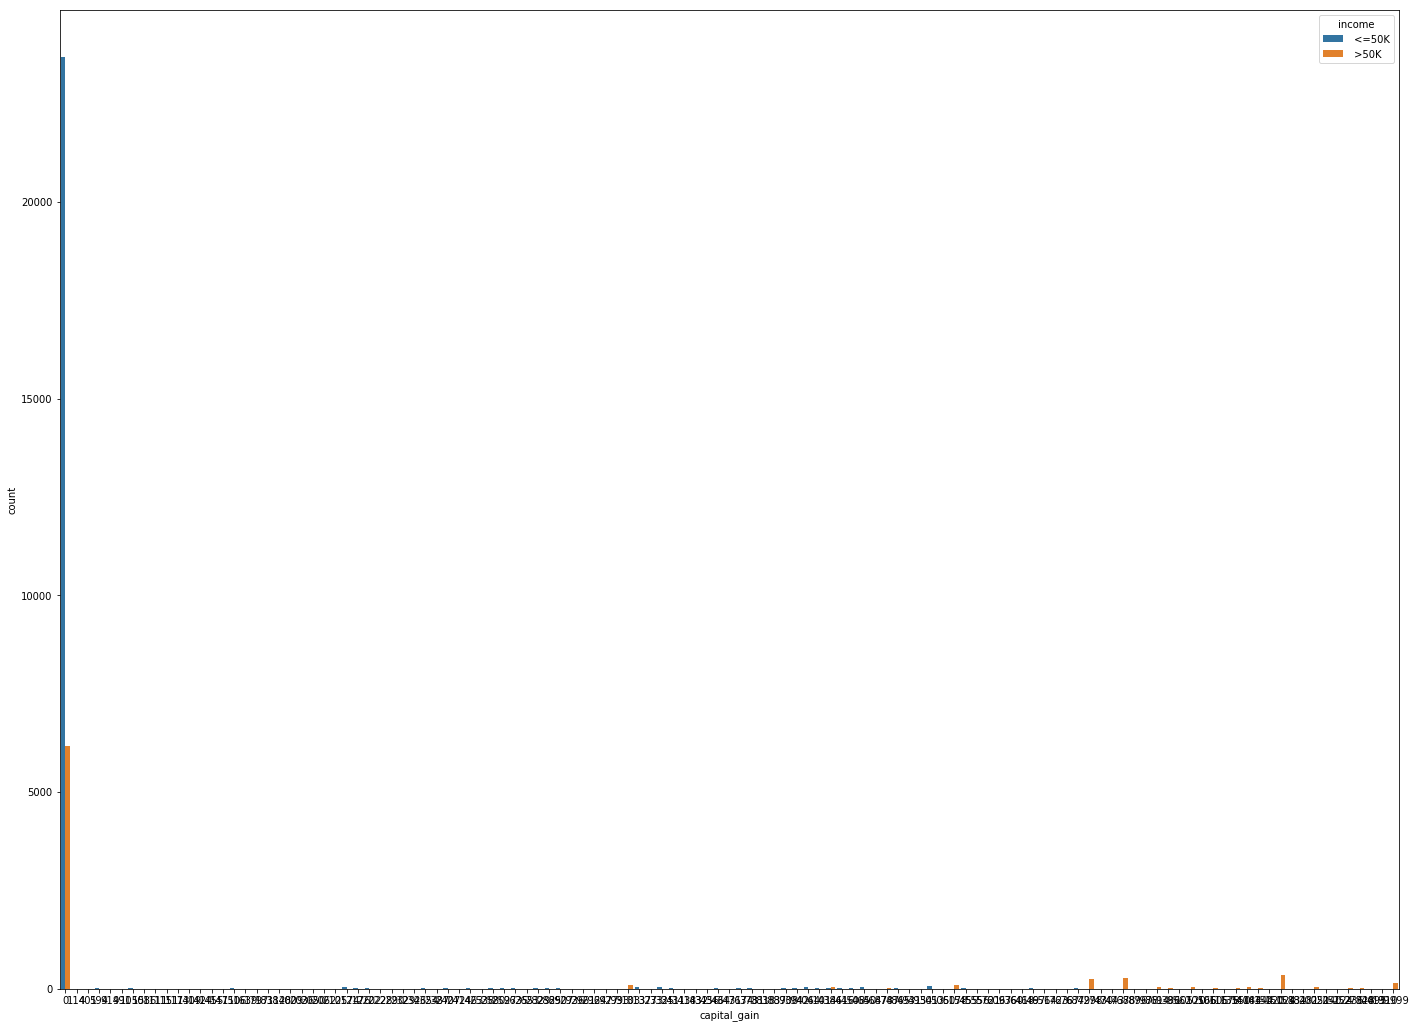

In [109]:
print(df['capital_gain'].value_counts())
sns.countplot(x="capital_gain", data=df,hue ='income')

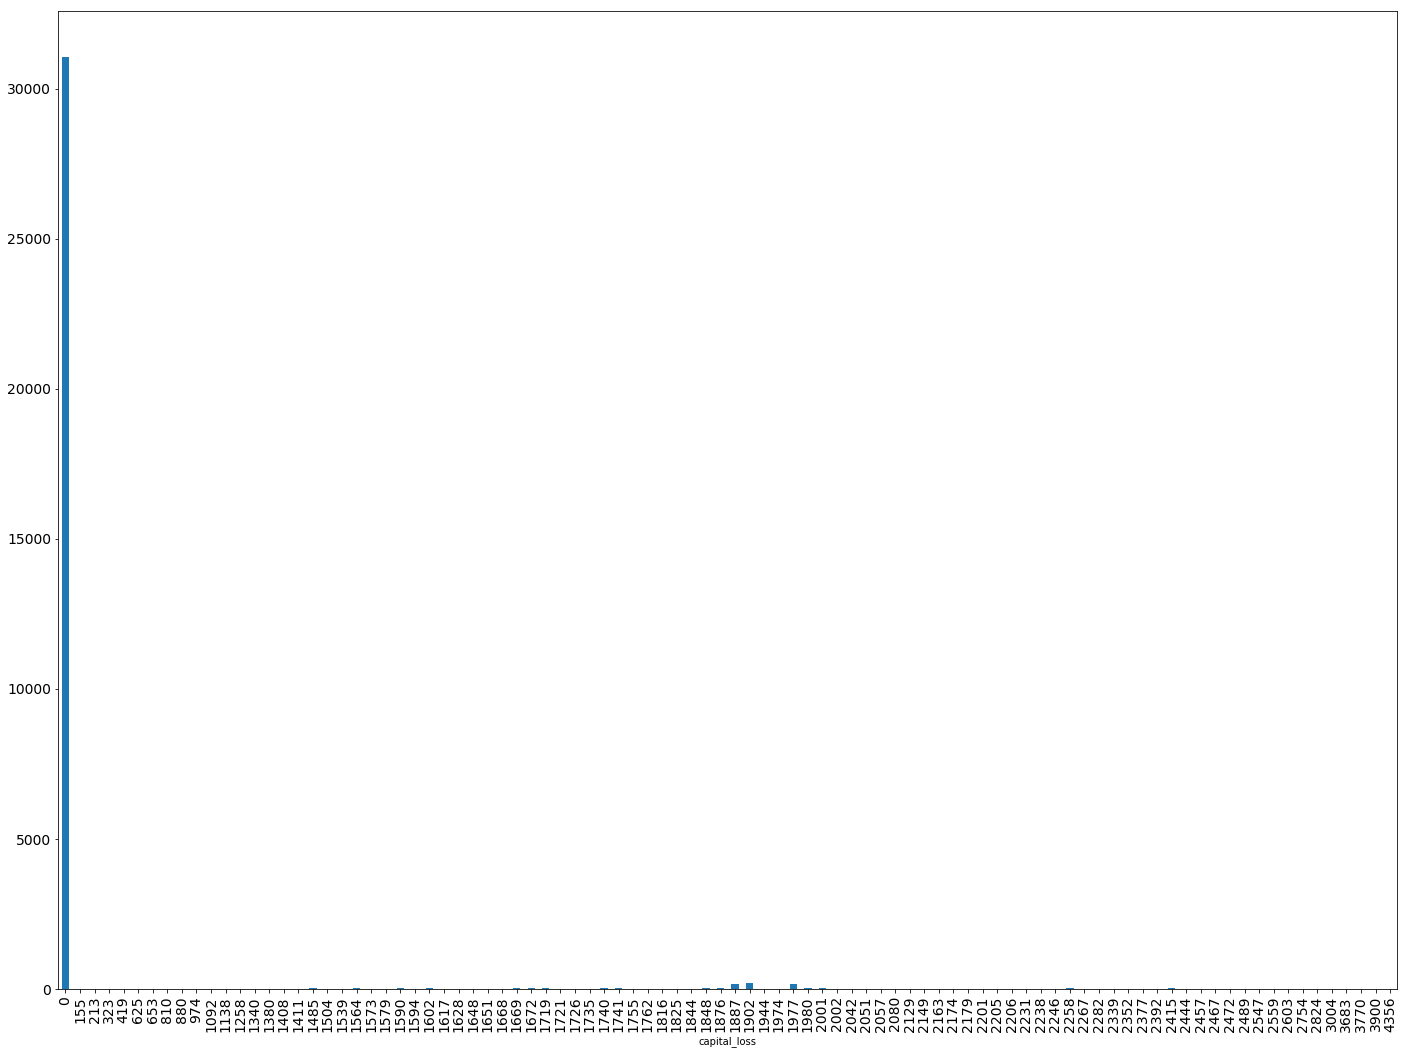

In [110]:
df.groupby(["capital_loss"]).size().plot(kind="bar",fontsize=14)

0       31042
1902      202
1977      168
1887      159
1848       51
1485       51
2415       49
1602       47
1740       42
1590       40
1876       39
1672       34
1564       25
2258       25
1669       24
1741       24
2001       24
1980       23
1719       22
2002       21
2051       21
1408       21
1579       20
2377       20
1721       18
1504       18
1974       18
2339       17
2179       15
1628       15
        ...  
323         3
4356        3
2267        3
3683        2
1755        2
2352        2
1648        2
1138        2
810         2
1735        2
2238        2
2754        2
3004        2
3900        2
974         2
2149        2
1816        2
3770        2
2080        1
2489        1
2282        1
2163        1
155         1
2467        1
1844        1
1411        1
1539        1
2472        1
1944        1
2201        1
Name: capital_loss, Length: 92, dtype: int64


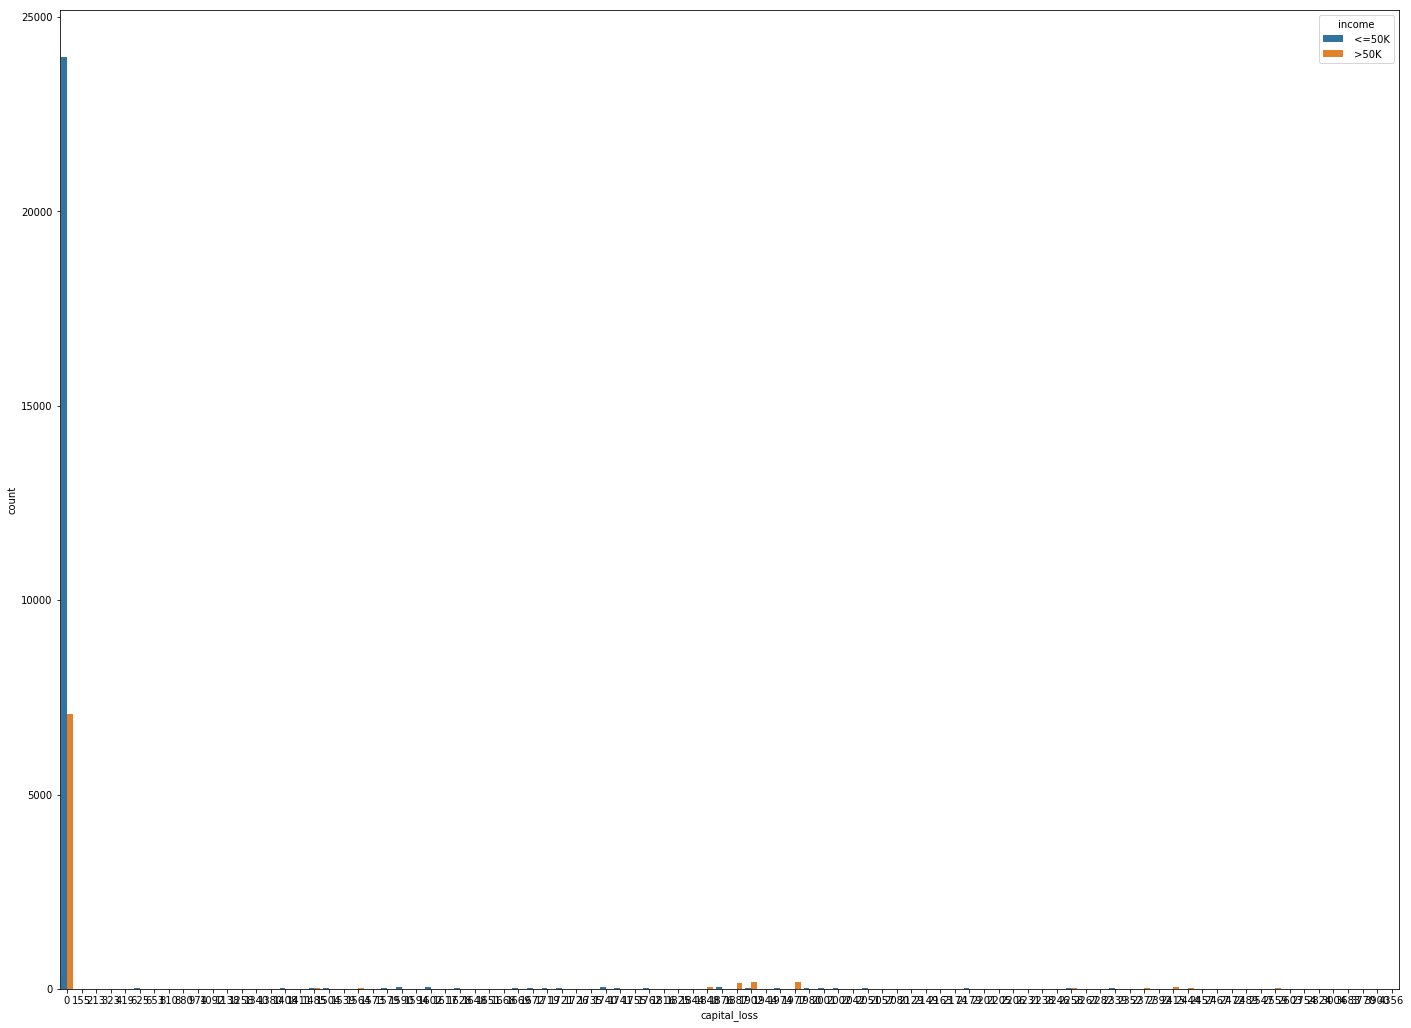

In [111]:
print(df['capital_loss'].value_counts())
sns.countplot(x="capital_loss", data=df,hue ='income')

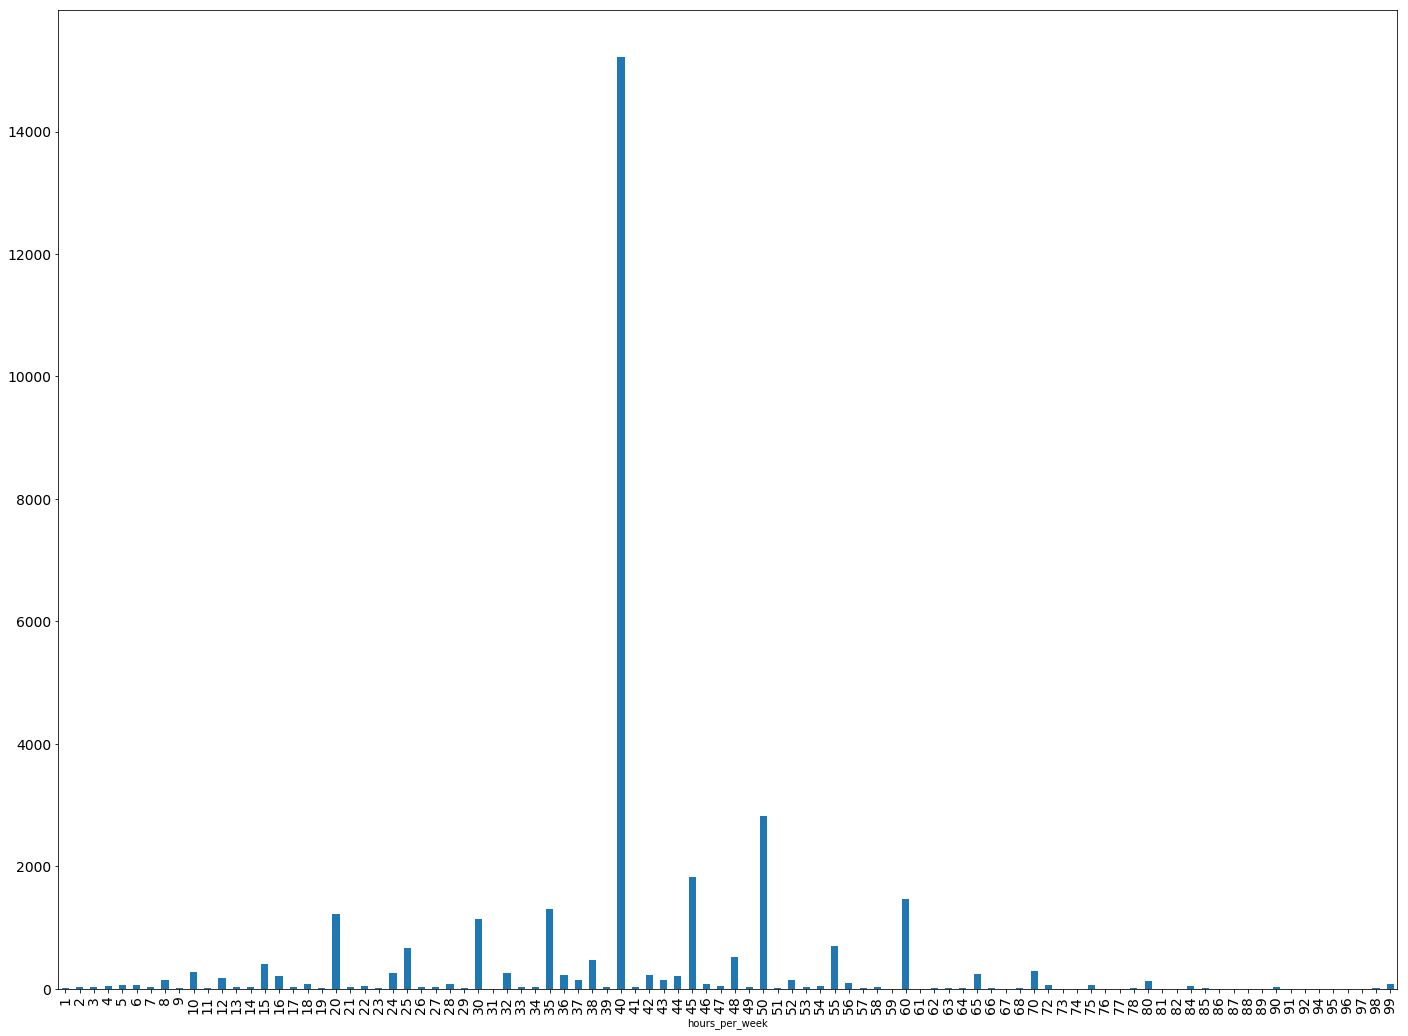

In [112]:
df.groupby(["hours_per_week"]).size().plot(kind="bar",fontsize=14)


40    15217
50     2819
45     1824
60     1475
35     1297
20     1224
30     1149
55      694
25      674
48      517
38      476
15      404
70      291
10      278
32      266
24      252
65      244
36      220
42      219
44      212
16      205
12      173
43      151
37      149
8       145
52      138
80      133
56       97
28       86
99       85
      ...  
19       14
64       14
51       13
85       13
68       12
98       11
11       11
63       10
78        8
29        7
77        6
59        5
31        5
96        5
67        4
91        3
76        3
81        3
73        2
89        2
97        2
88        2
86        2
61        2
95        2
92        1
94        1
87        1
74        1
82        1
Name: hours_per_week, Length: 94, dtype: int64


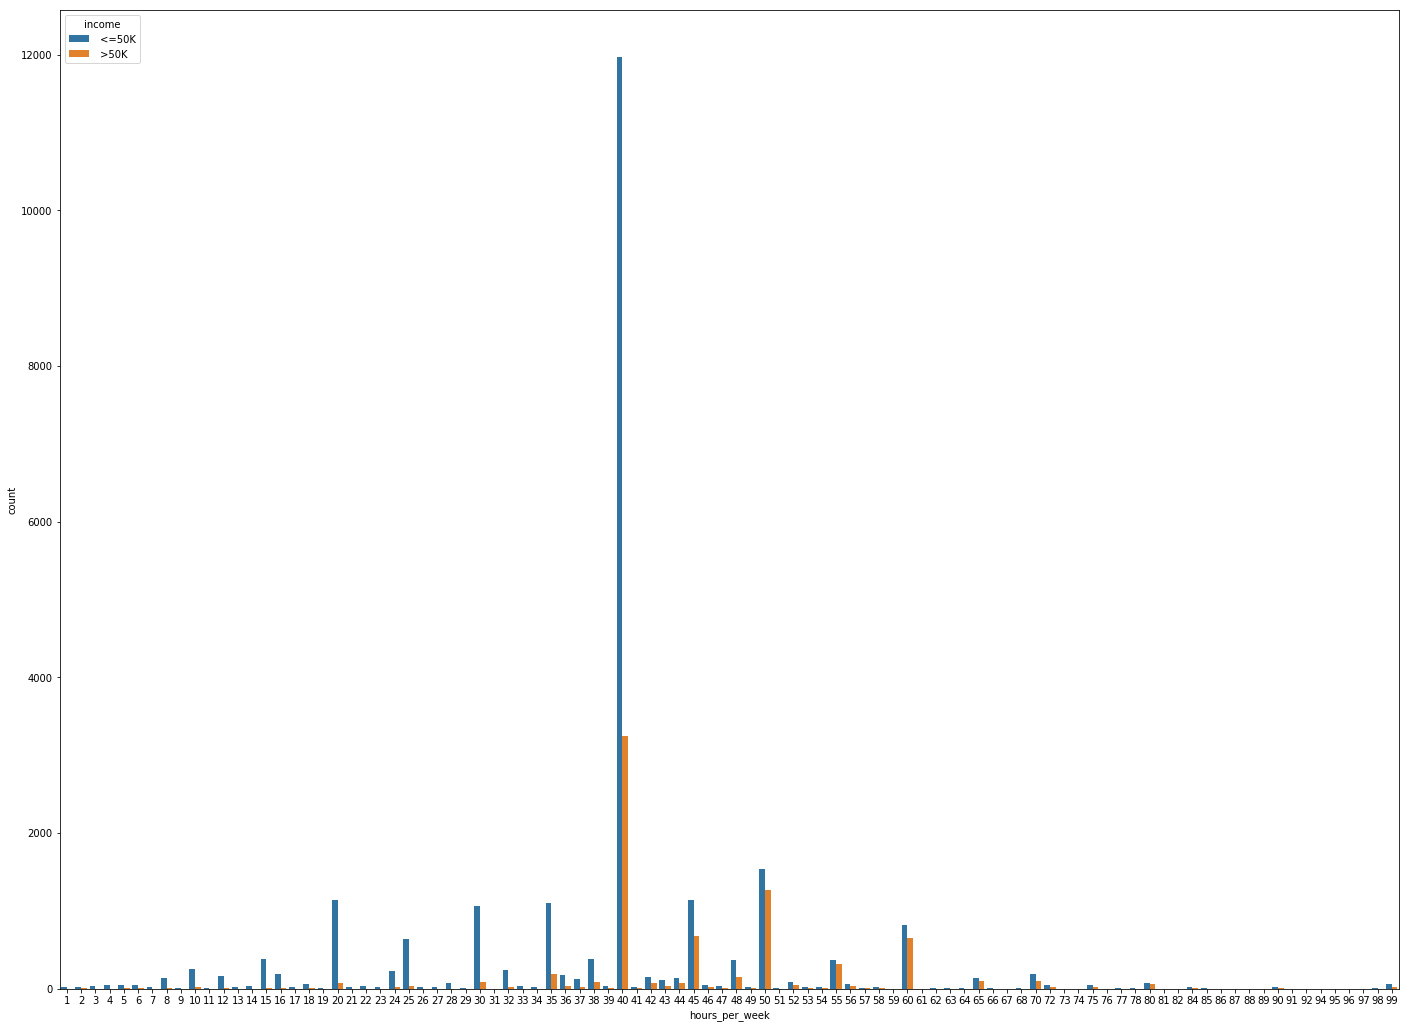

In [113]:
print(df['hours_per_week'].value_counts())
sns.countplot(x="hours_per_week", data=df,hue ='income')

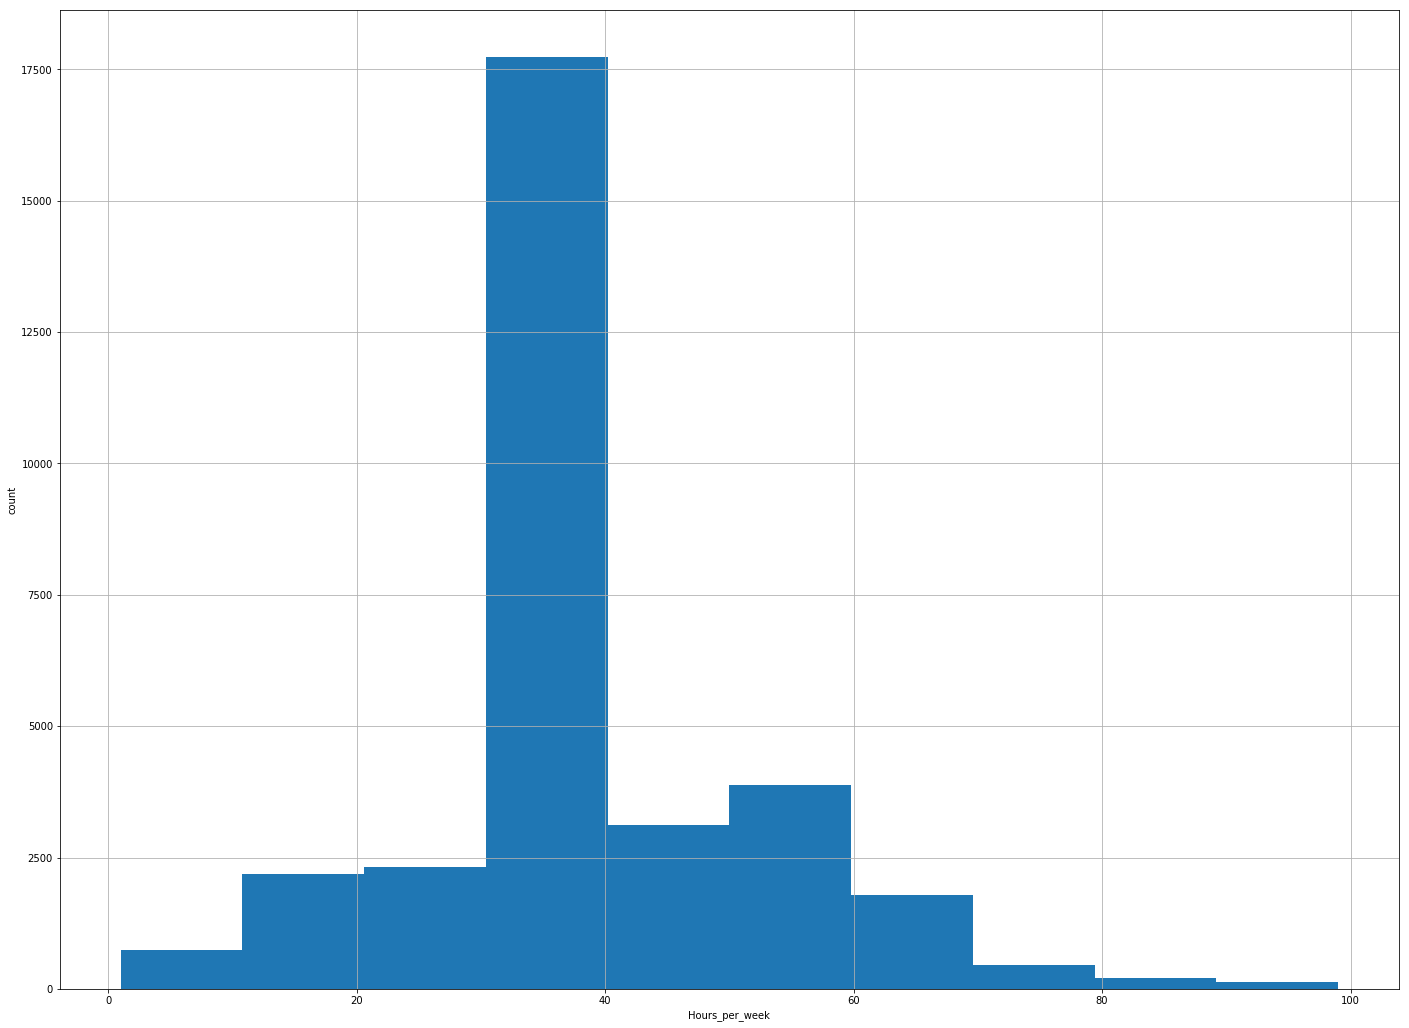

In [114]:
df['hours_per_week'].hist()
plt.xlabel('Hours_per_week')
plt.ylabel('count')
plt.show()

In [115]:
encoder = LabelBinarizer()
df_cat = df["martial_status"]
df_cat_1hot = encoder.fit_transform(df_cat)
print(df_cat_1hot)
#print(encoder.classes_)
df['martial_status'] = df_cat_1hot
#df.head()

[[0 0 0 ... 1 0 0]
 [0 0 1 ... 0 0 0]
 [1 0 0 ... 0 0 0]
 ...
 [0 0 0 ... 0 0 1]
 [0 0 0 ... 1 0 0]
 [0 0 1 ... 0 0 0]]


In [116]:
encoder = LabelBinarizer()
df_cat = df["education"]
df_cat_1hot = encoder.fit_transform(df_cat)
print(df_cat_1hot)
#print(encoder.classes_)
df['education'] = df_cat_1hot
#df.head()

[[0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 ...
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]]


In [117]:
encoder = LabelBinarizer()
df_cat = df["relationship"]
df_cat_1hot = encoder.fit_transform(df_cat)
print(df_cat_1hot)
#print(encoder.classes_)
df['relationship'] = df_cat_1hot
#df.head()

[[0 1 0 0 0 0]
 [1 0 0 0 0 0]
 [0 1 0 0 0 0]
 ...
 [0 0 0 0 1 0]
 [0 0 0 1 0 0]
 [0 0 0 0 0 1]]


In [118]:
encoder = LabelBinarizer()
df_cat = df["race"]
df_cat_1hot = encoder.fit_transform(df_cat)
print(df_cat_1hot)
#print(encoder.classes_)
df['race'] = df_cat_1hot
#df.head()

[[0 0 0 0 1]
 [0 0 0 0 1]
 [0 0 0 0 1]
 ...
 [0 0 0 0 1]
 [0 0 0 0 1]
 [0 0 0 0 1]]


In [119]:
encoder = LabelBinarizer()
df_cat = df["sex"]
df_cat_1hot = encoder.fit_transform(df_cat)
print(df_cat_1hot)
#print(encoder.classes_)
df['sex'] = df_cat_1hot
#df.head()

[[1]
 [1]
 [1]
 ...
 [0]
 [1]
 [0]]


In [120]:
encoder = LabelBinarizer()
df_cat = df["income"]
df_cat_1hot = encoder.fit_transform(df_cat)
print(df_cat_1hot)
print(encoder.classes_)
df['income'] = df_cat_1hot
#df.head()

[[0]
 [0]
 [0]
 ...
 [0]
 [0]
 [1]]
[' <=50K' ' >50K']


In [121]:
df.head()

,age,fnlwgt,education,education_num,martial_status,relationship,race,sex,capital_gain,capital_loss,hours_per_week,income
0,39,77516,0,13,0,0,0,1,2174,0,40,0
1,50,83311,0,13,0,1,0,1,0,0,13,0
2,38,215646,0,9,1,0,0,1,0,0,40,0
3,53,234721,0,7,0,1,0,1,0,0,40,0
4,28,338409,0,13,0,0,0,0,0,0,40,0


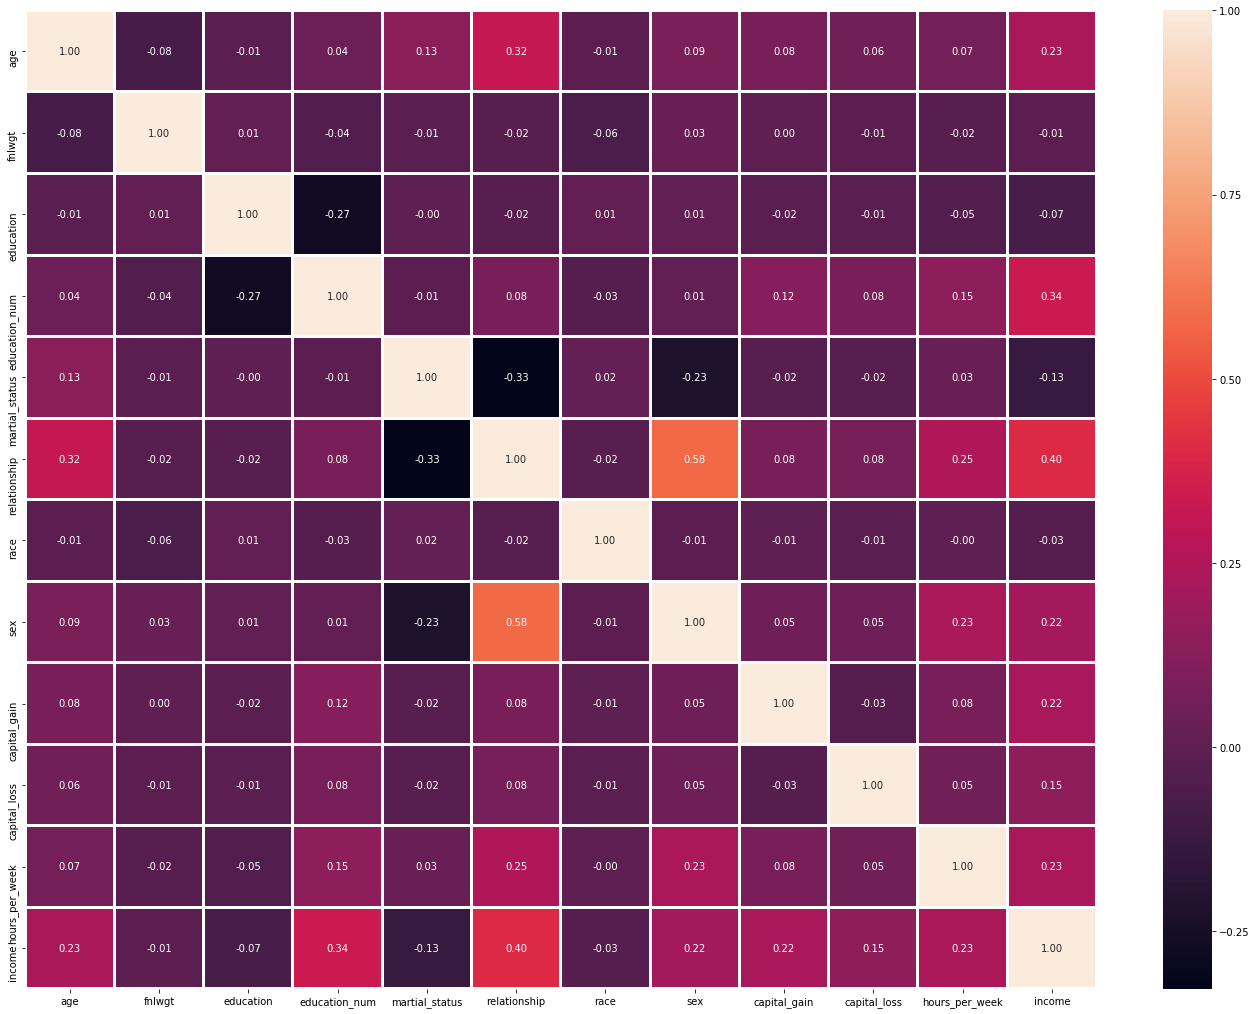

In [122]:
import seaborn as sns
sns.heatmap(df.corr(), annot=True,fmt='.2f',linewidths=2)

In [123]:
df.drop(['fnlwgt','education','relationship','martial_status'], axis=1, inplace=True)

In [124]:
df.head()


,age,education_num,race,sex,capital_gain,capital_loss,hours_per_week,income
0,39,13,0,1,2174,0,40,0
1,50,13,0,1,0,0,13,0
2,38,9,0,1,0,0,40,0
3,53,7,0,1,0,0,40,0
4,28,13,0,0,0,0,40,0


In [125]:
X = df[['age', 'education_num','capital_gain','capital_loss','hours_per_week','sex','race']]
y = df['income']#target
X.head()

,age,education_num,capital_gain,capital_loss,hours_per_week,sex,race
0,39,13,2174,0,40,1,0
1,50,13,0,0,13,1,0
2,38,9,0,0,40,1,0
3,53,7,0,0,40,1,0
4,28,13,0,0,40,0,0


In [137]:
# Import module to split dataset
from sklearn.model_selection import train_test_split

# Split data set into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=101)

In [138]:
# Import module for fitting
from sklearn.linear_model import LogisticRegression

# Create instance (i.e. object) of LogisticRegression
logmodel = LogisticRegression()#inticlise any parameter? read the documents

# Fit the model using the training data
# X_train -> parameter supplies the data features
# y_train -> parameter supplies the target labels
logmodel.fit(X_train, y_train)# it should always call only with train data not in test data
print(logmodel.coef_)#attributes
print(logmodel.intercept_)#attributes

[[ 3.70093325e-02  3.06922505e-01  3.11495245e-04  6.73102635e-04
   3.06586696e-02  1.06970866e+00 -4.19018963e-01]]
[-8.23023004]


D:\anaconda\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


In [139]:
predictions = logmodel.predict(X_test)
predictions


array([0, 0, 0, ..., 1, 0, 0])

In [140]:
print(predictions.size)

6513


In [141]:
from sklearn.metrics import classification_report

In [142]:
print(classification_report(y_test,predictions))

              precision    recall  f1-score   support

           0       0.84      0.95      0.90      4972
           1       0.74      0.43      0.55      1541

   micro avg       0.83      0.83      0.83      6513
   macro avg       0.79      0.69      0.72      6513
weighted avg       0.82      0.83      0.81      6513



In [151]:
from sklearn.metrics import confusion_matrix
tn, fp, fn, tp = confusion_matrix(y_test, predictions).ravel()
print(tn, fp, fn, tp)
print([tp,fp])
print([fn,tn])

4743 229 873 668
[668, 229]
[873, 4743]


In [152]:
#import the KNeighborsClassifier class from sklearn
from sklearn.neighbors import KNeighborsClassifier

#import metrics model to check the accuracy 
from sklearn import metrics
#Try running from k=1 through 25 and record testing accuracy
k_range = range(1,30)
scores = {}
scores_list = []
for k in k_range:
        knn = KNeighborsClassifier(n_neighbors=20)
        knn.fit(X_train,y_train)
        y_pred=knn.predict(X_test)
        scores[k] = metrics.accuracy_score(y_test,y_pred)
        scores_list.append(metrics.accuracy_score(y_test,y_pred))

In [153]:
scores

{1: 0.846307385229541,
 2: 0.846307385229541,
 3: 0.846307385229541,
 4: 0.846307385229541,
 5: 0.846307385229541,
 6: 0.846307385229541,
 7: 0.846307385229541,
 8: 0.846307385229541,
 9: 0.846307385229541,
 10: 0.846307385229541,
 11: 0.846307385229541,
 12: 0.846307385229541,
 13: 0.846307385229541,
 14: 0.846307385229541,
 15: 0.846307385229541,
 16: 0.846307385229541,
 17: 0.846307385229541,
 18: 0.846307385229541,
 19: 0.846307385229541,
 20: 0.846307385229541,
 21: 0.846307385229541,
 22: 0.846307385229541,
 23: 0.846307385229541,
 24: 0.846307385229541,
 25: 0.846307385229541,
 26: 0.846307385229541,
 27: 0.846307385229541,
 28: 0.846307385229541,
 29: 0.846307385229541}

Text(0, 0.5, 'Testing Accuracy')

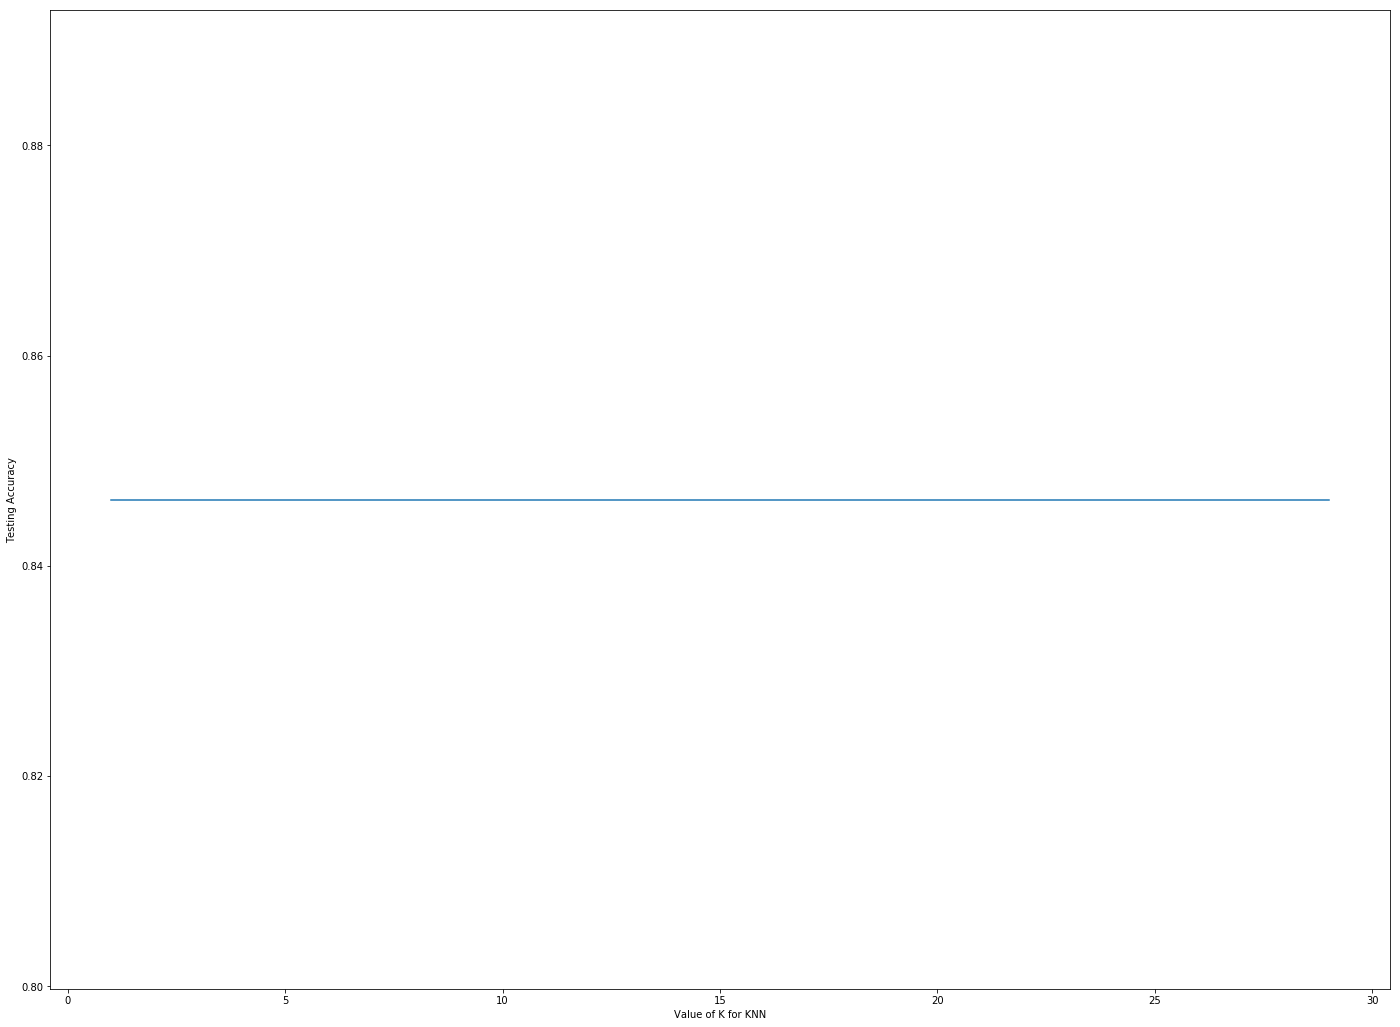

In [155]:
#plot the relationship between K and the testing accuracy
plt.plot(k_range,scores_list)
plt.xlabel('Value of K for KNN')
plt.ylabel('Testing Accuracy')

In [156]:
from sklearn.tree import DecisionTreeClassifier
dtreemodel = DecisionTreeClassifier()
# Fit the model using the training data
# X_train -> parameter supplies the data features
# y_train -> parameter supplies the target labels
dtreemodel.fit(X_train, y_train)

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=None,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=None,
            splitter='best')

In [157]:
dtreemodel.classes_

array([0, 1])

In [158]:
dtreemodel.feature_importances_

array([0.2640401 , 0.18367015, 0.2642088 , 0.08356911, 0.14476564,
       0.05615483, 0.00359137])

In [159]:
predictions = dtreemodel.predict(X_test)

In [201]:
print(X_test[0:15])
print(predictions[0:15])

       age  education_num  capital_gain  capital_loss  hours_per_week  sex  \
22357   51              9             0             0              40    0   
26009   19              7             0             0              30    1   
20734   40              9             0             0              40    1   
17695   17              6             0             0              20    1   
27908   61              4          7688             0              40    1   
27225   58             10             0             0              40    0   
13108   37              9             0             0              40    1   
27552   22             11             0             0              40    0   
14043   22              9             0             0              40    1   
30313   26             10             0             0              20    0   
30539   45             16             0          3004              35    0   
12462   44             13             0             0           

In [202]:
print(y_train[0:3])
print(predictions[0:3])

30278    0
19903    0
148      0
Name: income, dtype: int32
[0 0 0]


In [203]:
from sklearn import tree
with open("tree1.dot", 'w') as f:
     f = tree.export_graphviz(dtreemodel,
                              out_file=f,
                              max_depth = 10,
                              impurity = True,
                              feature_names=['age','education_num','capital_gain','capital_loss','hours_per_week','sex','race'],
                              class_names=['0','1'],
                              rounded = True,
                              filled= True )

In [204]:
from subprocess import check_call
check_call(['dot', '-Tpng', 'tree1.dot', '-o', 'tree1.png'])

FileNotFoundError: [WinError 2] The system cannot find the file specified

In [205]:
dtreemodel.score(X_test, y_test)


0.8323353293413174

In [206]:
# List of values to try for max_depth:
max_depth_range = list(range(1, 40))
# List to store the accuracy for each value of max_depth:
accuracy = []
for depth in max_depth_range:
    
    clf = DecisionTreeClassifier(max_depth = depth, random_state=0)
    clf.fit(X_train, y_train)
    score = clf.score(X_test, y_test)
    accuracy.append(score)

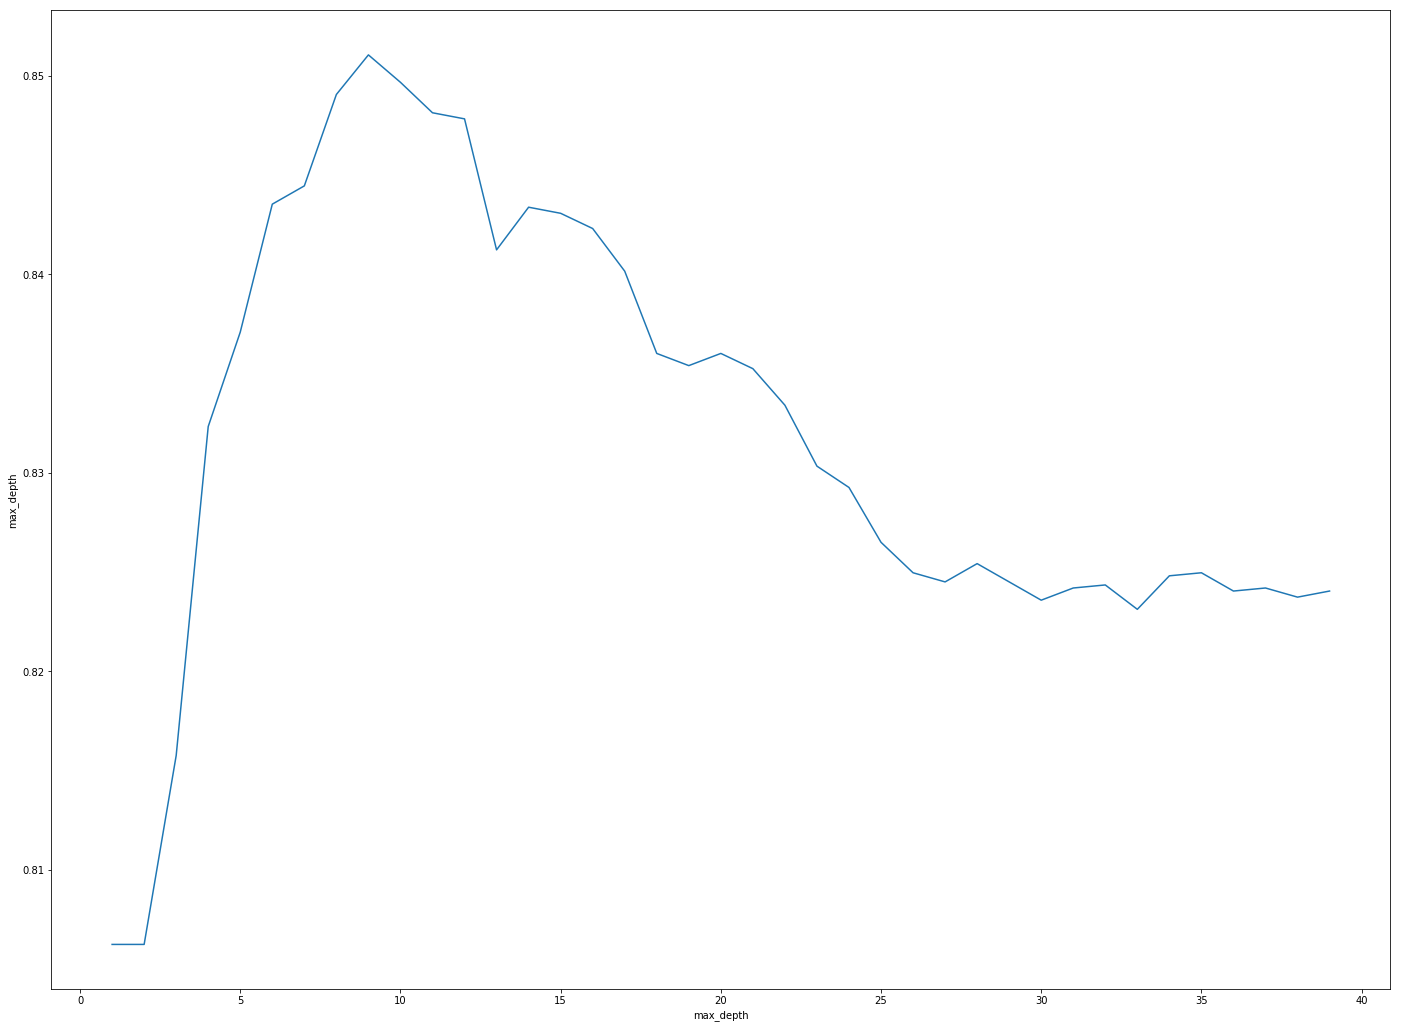

In [207]:
plt.xlabel("max_depth")
plt.ylabel("max_depth")
plt.plot(max_depth_range,accuracy)

In [208]:
# Import module for fitting
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score
dtreemodel = DecisionTreeClassifier(max_depth=4)
# Fit the model using the training data
# X_train -> parameter supplies the data features
# y_train -> parameter supplies the target labels
dtreemodel.fit(X_train, y_train)

predictions = dtreemodel.predict(X_test)
print(f"{accuracy_score(y_test, predictions)}")
print('Classifier Confusion matrix :','\n',confusion_matrix(y_test,predictions))
print('Classifier evaluation index :','\n',classification_report(y_test,predictions))

0.8323353293413174
Classifier Confusion matrix : 
 [[4643  329]
 [ 763  778]]
Classifier evaluation index : 
               precision    recall  f1-score   support

           0       0.86      0.93      0.89      4972
           1       0.70      0.50      0.59      1541

   micro avg       0.83      0.83      0.83      6513
   macro avg       0.78      0.72      0.74      6513
weighted avg       0.82      0.83      0.82      6513



In [209]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score

rnd_clf = RandomForestClassifier(n_estimators=500, max_leaf_nodes=16, n_jobs=-1, random_state=42)
rnd_clf.fit(X_train, y_train)

y_pred_rf = rnd_clf.predict(X_test)
print(accuracy_score(y_test, y_pred_rf))
print('Classifier Confusion matrix :','\n',confusion_matrix(y_test,y_pred_rf))
print('Classifier evaluation index :','\n',classification_report(y_test,y_pred_rf))

0.8424689083371718
Classifier Confusion matrix : 
 [[4809  163]
 [ 863  678]]
Classifier evaluation index : 
               precision    recall  f1-score   support

           0       0.85      0.97      0.90      4972
           1       0.81      0.44      0.57      1541

   micro avg       0.84      0.84      0.84      6513
   macro avg       0.83      0.70      0.74      6513
weighted avg       0.84      0.84      0.82      6513



In [210]:
from sklearn.ensemble import AdaBoostClassifier
from sklearn.tree import DecisionTreeClassifier

ada_clf = AdaBoostClassifier(
    DecisionTreeClassifier(max_depth=2), n_estimators=200,learning_rate=0.05, random_state=42)
ada_clf.fit(X_train, y_train)

AdaBoostClassifier(algorithm='SAMME.R',
          base_estimator=DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=2,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=None,
            splitter='best'),
          learning_rate=0.05, n_estimators=200, random_state=42)

In [211]:
y_pred = ada_clf.predict(X_test)
print(accuracy_score(y_test, y_pred))
print('Classifier Confusion matrix :','\n',confusion_matrix(y_test,y_pred))
print('Classifier evaluation index :','\n',classification_report(y_test,y_pred))


0.8513741747274681
Classifier Confusion matrix : 
 [[4809  163]
 [ 805  736]]
Classifier evaluation index : 
               precision    recall  f1-score   support

           0       0.86      0.97      0.91      4972
           1       0.82      0.48      0.60      1541

   micro avg       0.85      0.85      0.85      6513
   macro avg       0.84      0.72      0.76      6513
weighted avg       0.85      0.85      0.84      6513



Perdict the Actual test Data
NOW FOR THE MOMENT OF TRUTH
YOU CAN PICK ANY METHOD FROM BELOW  AND RUN THE TEST####
THESE NUMBER 
[61,4,7688,0,40,1,0], 
[45,16,0,3004,35,0,0],
[68,9,0,3683,40,0,1 ] CAN SHOW U >50K#####
PLZZ TRY FROM THE DATA SET ONLY#########
TO CHECK THE DATA GO IN [201] AND PICK THE DATA####



In [212]:
#age,ed_num,cap_gain,cap_loss,h/p/w,sex,race
income={0:'<=50k',1:'>50k'}
x_new = [[60,5,0,0,60,1,0], 
         [19,7,0,0,30,1,1]] 
y_predict = logmodel.predict(x_new)

print(income[y_predict[0]])
print(income[y_predict[0]])

<=50k
<=50k


In [213]:
#age,ed_num,cap_gain,cap_loss,h/p/w,sex,race
#income={0:'<=50k',1:'>50k'}
x_new = [[60,5,0,0,60,1,0],
         [30,9,1,1,40,1,1]]
y_predict = knn.predict(x_new)

print(income[y_predict[0]])
print(income[y_predict[1]])

<=50k
<=50k


In [214]:
#age,ed_num,cap_gain,cap_loss,h/p/w,sex,race
#income={0:'<=50k',1:'>50k'}
x_new = [[60,5,0,0,60,1,0],
         [30,9,1,1,40,1,1]]
y_predict = dtreemodel.predict(x_new)

print(income[y_predict[0]])
print(income[y_predict[1]])

<=50k
<=50k


In [215]:
#age,ed_num,cap_gain,cap_loss,h/p/w,sex,race
income={0:'<=50k',1:'>50k'}
x_new = [[60,5,0,0,60,1,0],
         [30,9,1,1,40,1,1]]
y_predict = rnd_clf.predict(x_new)

print(income[y_predict[0]])
print(income[y_predict[1]])

<=50k
<=50k


In [244]:
#age,ed_num,cap_gain,cap_loss,h/p/w,sex,race
income={0:'<=50k',1:'>50k'}
x_new = [[40,14,1,0,40,0,0]]
         #[[61,4,7688,0,40,1,0]]   
         #[68,9,0,3683,40,0,0]]
y_predict = rnd_clf.predict(x_new)

print(income[y_predict[0]])
#print(income[y_predict[0]])

<=50k


In [249]:
#age,ed_num,cap_gain,cap_loss,h/p/w,sex,race
income={0:'<=50k',1:'>50k'}
x_new = [[61,4,7688,0,40,1,0], 
         [45,16,0,3004,35,0,0],
         [68,9,0,3683,40,0,1]]
         
y_predict = ada_clf.predict(x_new)

print(income[y_predict[1]])
print(income[y_predict[1]])
print(income[y_predict[1]])


>50k
>50k
>50k


In [246]:
#age,ed_num,cap_gain,cap_loss,h/p/w,sex
#0 = <=50k  , 1 = >50k
#logmodel.predict([[17,2,1,0,3,1]])
#logmodel.predict([[30,9,1,1,40,1]])
#knn.predict([[30,2,1,1,30,0]])
#dtreemodel.predict([[40,3,0,0,40,1]])
#rnd_clf.predict([[50,4,1,0,50,0]])
#ada_clf.predict([[60,5,0,0,60,1]])